<p style="font-size:36px;text-align:center"> <b>Association Rule feature Mining (ARM) in Network Intrusion Detection System</b> </p>

# 1. Business Problem

## 1.1. Description
<p>Source: <a>https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets</a></p>
<p> Data: CISCO Networking Dataset - The UNSW-NB15 Dataset </p>
<p> Download UNSW-NB15 - csv file.</p> 

<h6> Problem statement : </h6>
<p> Classify the given network is intrusion or normal based on evidence from The raw network packets of the UNSW-NB 15 dataset. it was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS). </p>

# 2. Machine Learning Problem Formulation

## 2.1. Data

### 2.1.1. Data Overview

- Source: https://cloudstor.aarnet.edu.au/plus/index.php/s/2DhnLGDdEECo4ys
- We have multiple data files: download the UNSW-NB15 - csv file this file contains a following structure

        a part of training and testing set - folder contains train and test data csv files
        NUSW-NB15_features.csv - Feature description
        NUSW-NB15_GT.csv
        The UNSW-NB15 description.pdf
        UNSW-NB15_1.csv
        UNSW-NB15_2.csv
        UNSW-NB15_3.csv
        UNSW-NB15_4.csv
        UNSW-NB15_LIST_EVENTS.csv
        

- These features are described in **UNSW-NB15_features.csv** file.

- The total number of records is two million and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.

- The ground truth table is named **UNSW-NB15_GT.csv** and the list of event file is called UNSW-NB15_LIST_EVENTS.csv.

- A partition from this dataset is configured as a training set and testing set, namely, **UNSW_NB15_training-set.csv** and **UNSW_NB15_testing-set.csv** respectively.

- The number of records in the training set is 82,332 records and the testing set is 175,341 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively. 

- <p> 
    Data file's information:
    <ul>
        <li> <p>both train and test files contains 45 columns</p> <p>['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
            'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']</p> </li>     
        <li>
        Categorical (4) columns
        </li>
        <li>
        Numerical (41) columns
        </li>
    </ul>
</p>

## 2.2. Mapping the real-world problem to an ML problem

### 2.2.1. Type of Machine Learning Problem

<p>
    
            There are two different class normal or attack. Find the network is normal or intrusion. => Binary class classification problem
   
      
    
</p>

### 2.2.2. Performance Metric

metric used to identify the performance of the model

Metric(s): 
* AUC and f1-score 
* Confusion matrix
* FAR - false alarm rate should be as minimum as possible


### 2.2.3. Machine Learing Objectives and Constraints

<p>   
    
            Objective: Predict the probability of each data-point whether the network is normal or attack.
    
    
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
train_data =pd.read_csv("data/UNSW_NB15_training-set.csv")
print(train_data.shape)
train_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# 3. Exploratory Data Analysis 

## 3.1 visualizing class label

Rectangle(xy=(-0.4, 0), width=0.8, height=37000, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=45332, angle=0)
[    0.   8233.2 16466.4 24699.6 32932.8 41166.  49399.2 57632.4 65865.6
 74098.8 82332. ]


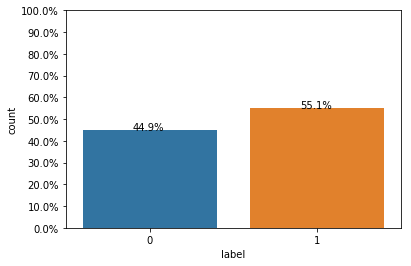

In [6]:
total = len(train_data)*1.
ax=sns.countplot(x="label", data=train_data)
for p in ax.patches:
    print(p)
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
print(ax.yaxis.get_majorticklocs())
#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.savefig('class_label.png')
plt.show()

Above plot show that the dataset is not an imbalanced dataset

## 3.2 visualizing categorical data

In [8]:
cat_feature = train_data.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

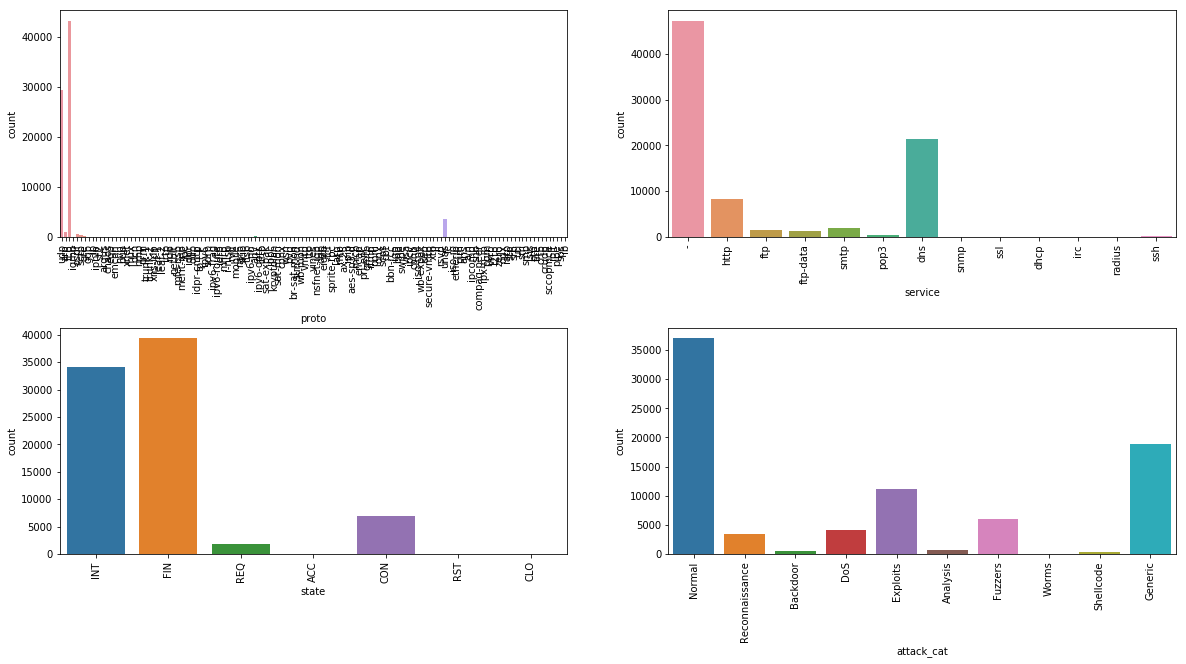

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.4)
for col, subplot in zip(cat_feature, ax.flatten()):
    sns.countplot(train_data[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.savefig('cate_f.png')
plt.show()

From the categorical data we can see the data imbalance. Also “proto” category has more than 200 categories. Other columns have less than or equal 13 columns

## 3.2 visualizing numerical data and its distribution

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = train_data.drop(['id','label'], axis=1).select_dtypes(include=numerics).columns
num_features

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

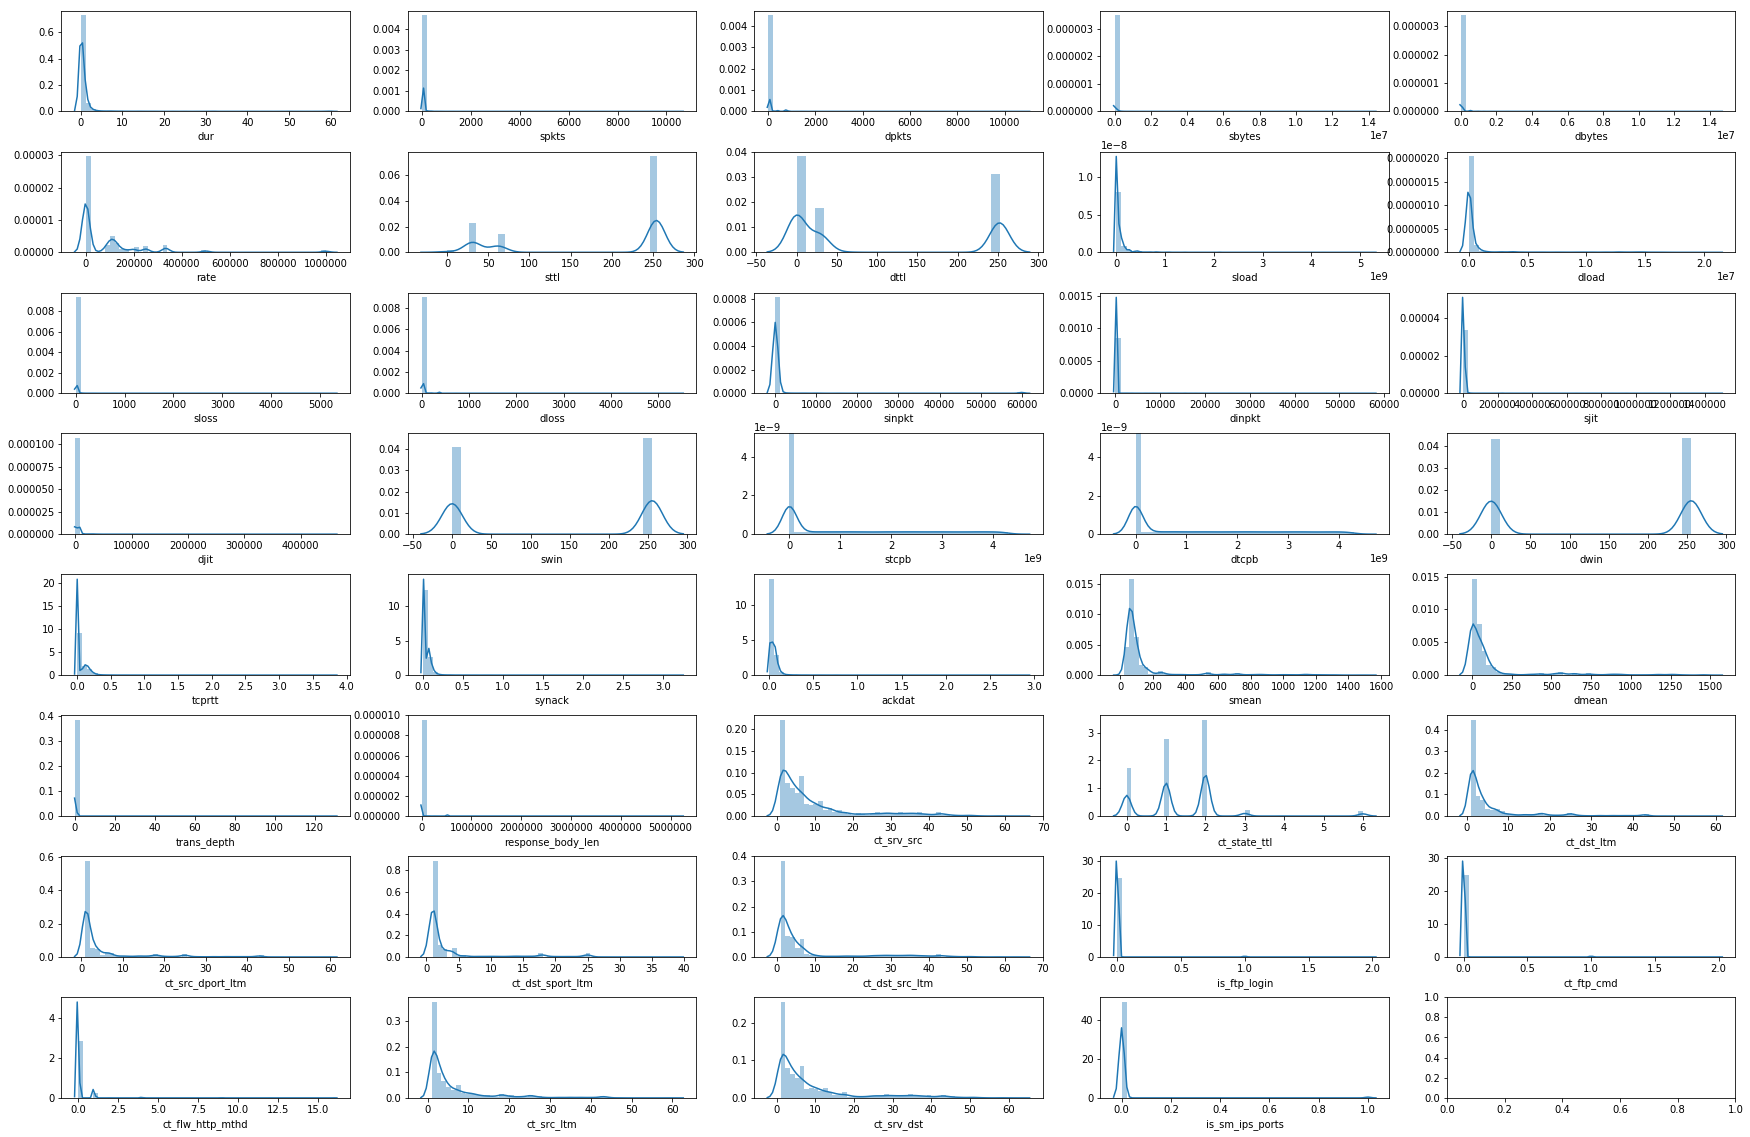

In [11]:
fig, ax = plt.subplots(8, 5, figsize=(30, 20))
plt.subplots_adjust(hspace = 0.4)
for col, splot in zip(num_features, ax.flatten()):
    sns.distplot(train_data[col], ax=splot)
plt.savefig('num_f.png')
plt.show()

from the distribution plot each feature have one value which is occurring more number of times than other values
As we can see from numerical data distribution there few features which are highly correlated with each other.

## 3.3 Correlation of data

In [12]:
df_corr = train_data.corr()

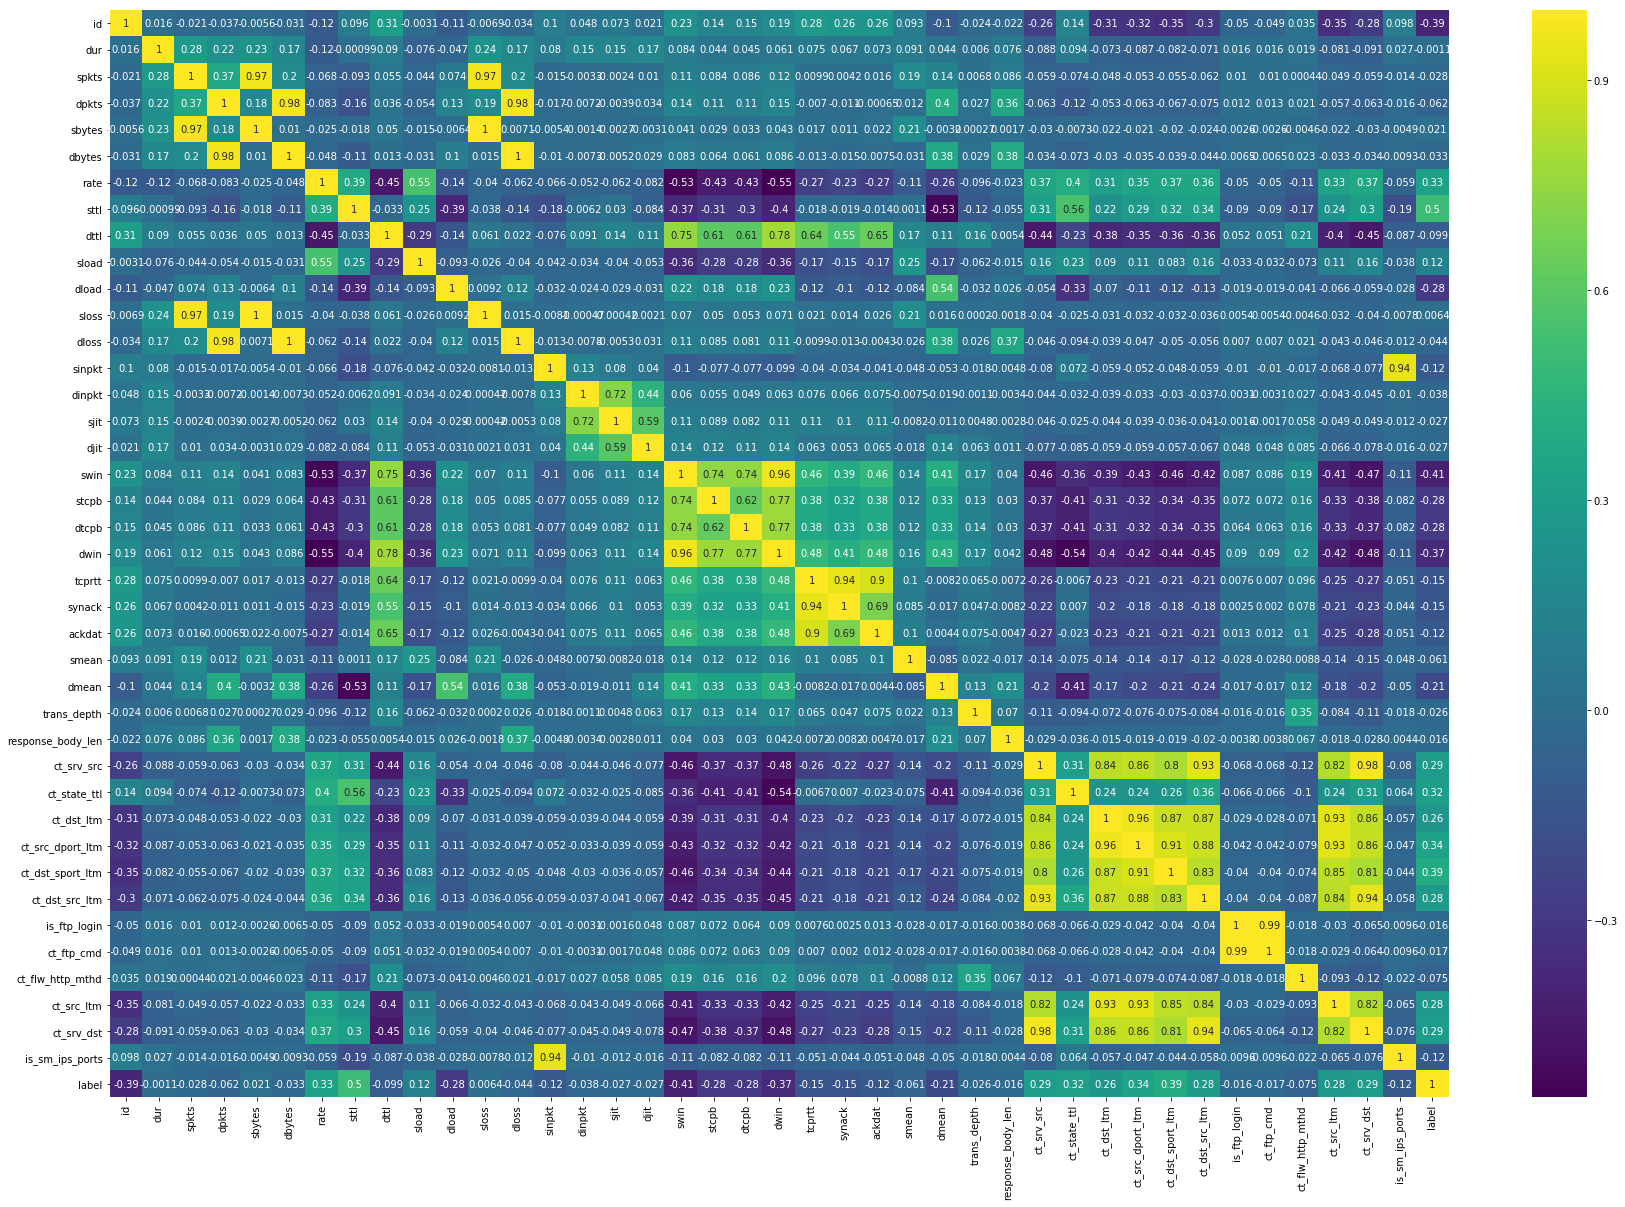

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.viridis)
plt.savefig('corr_mat.png')
plt.show()

- From above visualization we can clearly see that there are few columns which are having high correlation with one another.
- we will find correlation and distribution of those columns and eliminate the necessary one

In [263]:
high_corr_var=np.where(df_corr>0.95)

In [264]:
high_corr_var

(array([ 0,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  7,  8,
         9, 10, 11, 11, 11, 12, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 28, 29, 30, 30, 31, 31, 32, 33,
        34, 34, 35, 35, 36, 37, 38, 38, 39, 40], dtype=int64),
 array([ 0,  1,  2,  4, 11,  3,  5, 12,  2,  4, 11,  3,  5, 12,  6,  7,  8,
         9, 10,  2,  4, 11,  3,  5, 12, 13, 14, 15, 16, 17, 20, 18, 19, 17,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 38, 29, 30, 31, 30, 31, 32, 33,
        34, 35, 34, 35, 36, 37, 28, 38, 39, 40], dtype=int64))

In [265]:
#ref: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
high_corr_var=[(df_corr.columns[x],df_corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [266]:
high_corr_var

[('spkts', 'sbytes'),
 ('spkts', 'sloss'),
 ('dpkts', 'dbytes'),
 ('dpkts', 'dloss'),
 ('sbytes', 'sloss'),
 ('dbytes', 'dloss'),
 ('swin', 'dwin'),
 ('ct_srv_src', 'ct_srv_dst'),
 ('ct_dst_ltm', 'ct_src_dport_ltm'),
 ('is_ftp_login', 'ct_ftp_cmd')]

## 3.4 Feature Description

In [15]:
data_features =pd.read_csv("data/NUSW-NB15_features.csv", engine='python')
print(data_features.shape)

(49, 4)


In [185]:
data_features.head(49)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### 3.4.1 dur

In [196]:
data_features[6:7]

,No.,Name,Type,Description
6,7,dur,Float,Record total duration


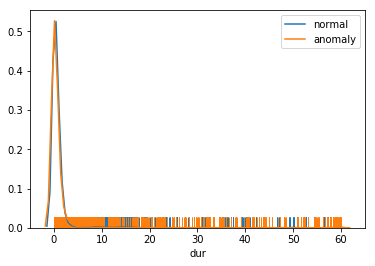

In [181]:
sns.distplot(train_data[train_data['label']==0]['dur'], label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['dur'], label='anomaly', hist=False, rug=True)
plt.legend()

dur is the total rocrd duration for both anomaly and normal.

### 3.4.2 sbytes - dbytes

In [197]:
data_features[7:9]

,No.,Name,Type,Description
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes


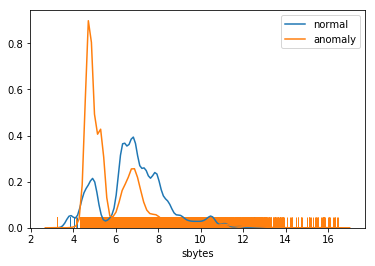

In [255]:
sns.distplot(train_data[train_data['label']==0]['sbytes'].apply(np.log1p), label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['sbytes'].apply(np.log1p), label='anomaly', hist=False, rug=True)
plt.legend()

- applied logarithm of x log(1+x) for some of the features to visualize properly 

### 3.4.3 sloss - dloss

In [217]:
data_features[11:13]

,No.,Name,Type,Description
11,12,sloss,Integer,Source packets retransmitted or dropped
12,13,dloss,Integer,Destination packets retransmitted or dropped


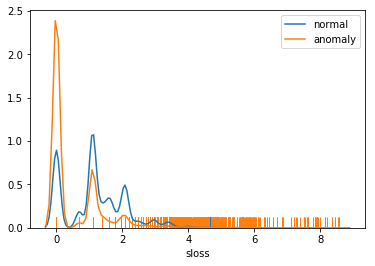

In [254]:
sns.distplot(train_data[train_data['label']==0]['sloss'].apply(np.log1p), label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['sloss'].apply(np.log1p), label='anomaly', hist=False, rug=True)
plt.legend()

- sloss and dloss have same disruption as we can see in overall numerical distribution plot.
-

### 3.4.4 spkts - dpkts

In [208]:
data_features[16:18]

,No.,Name,Type,Description
16,17,Spkts,integer,Source to destination packet count
17,18,Dpkts,integer,Destination to source packet count


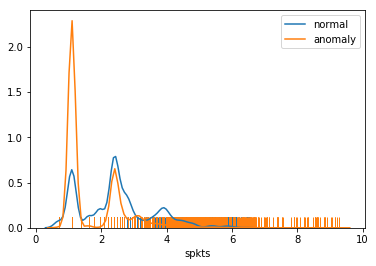

In [223]:
sns.distplot(train_data[train_data['label']==0]['spkts'].apply(np.log1p), label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['spkts'].apply(np.log1p), label='anomaly', hist=False, rug=True)
plt.legend()

- these sbytes and dbytes have same distribution. anomaly we can see it peaks to 0.8 and above. normal is below 0.4

In [243]:
print(train_data[['sbytes','sloss','spkts']].corr())
print(train_data[['dbytes','dloss','dpkts']].corr())

          sbytes     sloss     spkts
sbytes  1.000000  0.995027  0.965750
sloss   0.995027  1.000000  0.973644
spkts   0.965750  0.973644  1.000000
          dbytes     dloss     dpkts
dbytes  1.000000  0.997109  0.976419
dloss   0.997109  1.000000  0.981506
dpkts   0.976419  0.981506  1.000000


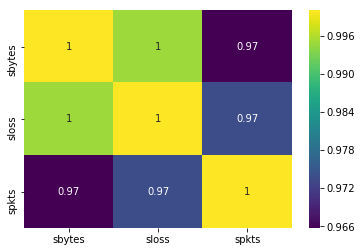

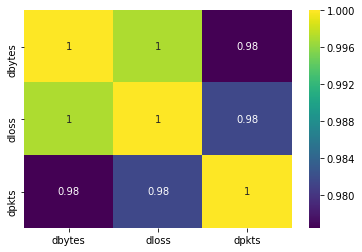

In [244]:
sns.heatmap(train_data[['sbytes','sloss','spkts']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(train_data[['dbytes','dloss','dpkts']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

- so we can drop column sbyte and dbytes from above representation.
- From this visualization we can see that both have high correlation and same distribution with other columns

### 3.4.5 sttl - dttl

In [211]:
data_features[9:11]

,No.,Name,Type,Description
9,10,sttl,Integer,Source to destination time to live value
10,11,dttl,Integer,Destination to source time to live value


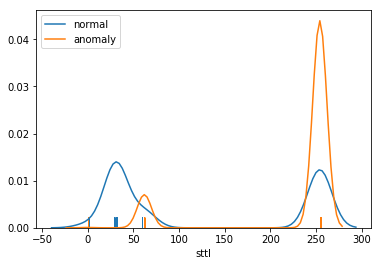

In [216]:
sns.distplot(train_data[train_data['label']==0]['sttl'], label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['sttl'], label='anomaly', hist=False, rug=True)
plt.legend()

- fewer amount of data have anomaly of higher rate. >0.2 are anomaly

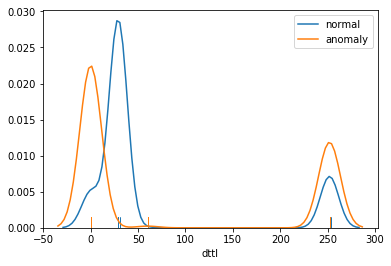

In [215]:
sns.distplot(train_data[train_data['label']==0]['dttl'], label='normal', hist=False, rug=True)
sns.distplot(train_data[train_data['label']==1]['dttl'], label='anomaly', hist=False, rug=True)
plt.legend()

- sttl and dttl have different distribution as we can see in overall numerical distribution plot. cant ignore column

### 3.4.6 swin - dwin

In [224]:
data_features[18:20]

,No.,Name,Type,Description
18,19,swin,integer,Source TCP window advertisement value
19,20,dwin,integer,Destination TCP window advertisement value


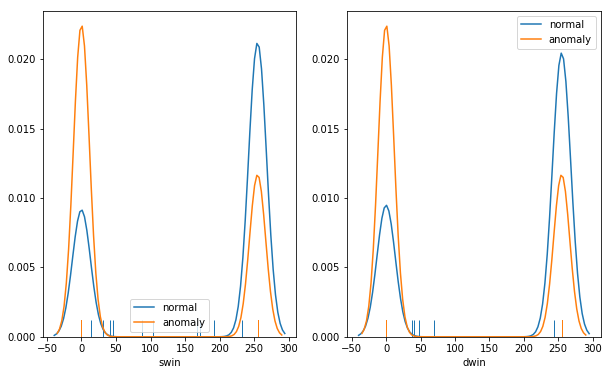

In [347]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['swin', 'dwin']):
    plt.subplot(1,2,i+1)
    sns.distplot(train_data[train_data['label']==0][col], label='normal', hist=False, rug=True)
    sns.distplot(train_data[train_data['label']==1][col], label='anomaly', hist=False, rug=True)
    plt.legend()
plt.show()

- From above distribution plot we can distinguish between normal and anomaly.
- window rate of -50 to 50 less than 0.0075 is normal and 200 to 300 less than 0.0075 is anomaly

### 3.4.7 ct_dst_src_ltm, ct_srv_src, ct_srv_dst

In [252]:
data_features[40:42]

,No.,Name,Type,Description
40,41,ct_srv_src,integer,No. of connections that contain the same servi...
41,42,ct_srv_dst,integer,No. of connections that contain the same servi...


In [254]:
list(data_features[40:42]['Description'])

['No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).',
 'No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).']

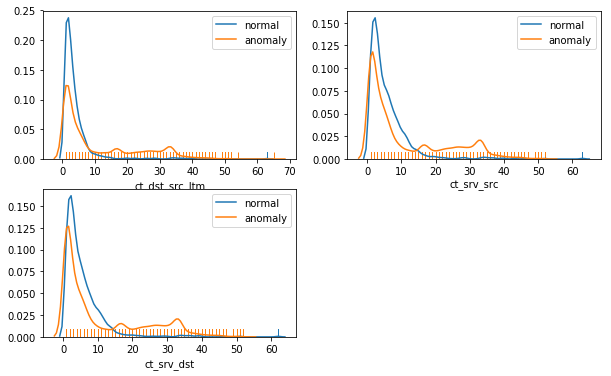

In [342]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['ct_dst_src_ltm', 'ct_srv_src', 'ct_srv_dst']):
    plt.subplot(2,2,i+1)
    sns.distplot(train_data[train_data['label']==0][col], label='normal', hist=False, rug=True)
    sns.distplot(train_data[train_data['label']==1][col], label='anomaly', hist=False, rug=True)
    plt.legend()
plt.show()

- As we can see the distribution are similar

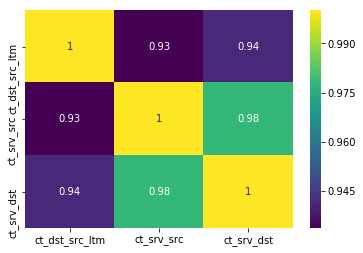

In [116]:
sns.heatmap(train_data[['ct_dst_src_ltm','ct_srv_src','ct_srv_dst']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

- we can drop column ct_srv_dst
- From this visualization we can see that three columns are having high correlation and same distribution

#### 3.4.8 'is_ftp_login', 'ct_ftp_cmd'

In [257]:
data_features[38:40]

,No.,Name,Type,Description
38,39,is_ftp_login,Binary,If the ftp session is accessed by user and pas...
39,40,ct_ftp_cmd,integer,No of flows that has a command in ftp session.


In [258]:
list(data_features[38:40]['Description'])

['If the ftp session is accessed by user and password then 1 else 0. ',
 'No of flows that has a command in ftp session.']

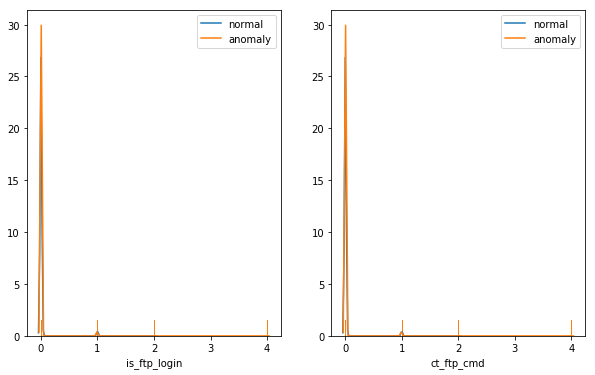

In [341]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['is_ftp_login', 'ct_ftp_cmd']):
    plt.subplot(1,2,i+1)
    sns.distplot(train_data[train_data['label']==0][col], label='normal', hist=False, rug=True)
    sns.distplot(train_data[train_data['label']==1][col], label='anomaly', hist=False, rug=True)
    plt.legend()
plt.show()

- As we can see the distribution are same and both the columns related to ftp session

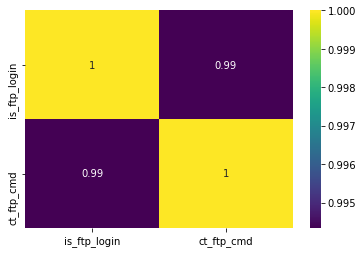

In [267]:
sns.heatmap(train_data[['is_ftp_login', 'ct_ftp_cmd']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

- we can drop ct_ftp_cmd. 
- From this visualization we can see that both have high correlation and same distribution

## 3.5 EDA conclusion

#### we can drop the 5 columns mentioned from above analysis which are highly correlated
- sbyte and dbytes
- ct_srv_dst
- ct_ftp_cmd
- dwin

In [3]:
train_data.drop(['sbytes', 'dbytes','ct_srv_dst', 'ct_ftp_cmd', 'dwin'], axis=1, inplace=True)
train_data.shape

(82332, 40)

# 4. ARM - Feature selection

## 4.1 Association Rule Mining

<hr>

Association rule mining is a frequent pattern mining it is to determine how frequent an item is in total transaction.
here Frequent item is a set of items which satisfies the minimum threshold value. threshold or metric for ARM. it is the support and confidence.

from our data set consider sbytes & dbytes two items. below is the rule.

**sbytes** **=>** **dbytes** **[support=3%, confidence- 70%]**

The set of items sbytes & dbytes are called antecedent and consequent.

above state means that there is 3% that sbytes and dbytes are frequent together in total transaction. and there are 70% confidence level that sbytes and dbytes are occurred together.

### 4.1.1 Implementation Steps

|**Steps**|
-----------
<center>Set the minimum threshold values</center>
               <center>⇩</center>
<center>find all the subsets on the transaction using **apriori algorithm** having support of 30% or more.</center>
                <center>⇩</center>
<center>Find all the item sets or rule of these subsets from step 2 which are having a higher confidence than minimum confidence and maximum rule length of 2.</center>
                <center>⇩</center>
<center>get the columns from the rules using a set {} to eliminate the repeated columns.</center>
                <center>⇩</center>
<center>use these columns as feature for machine learning models.</center>

<hr>

## 4.2 Data preprocessing
- For better understanding of dataset 
- Identify the catogarical and numerical data and perform following encoding
    - Catogarical data (Label encoding)
    - Numerical data (StandardScalar)
- convert the data into numerical values so that it will input to machine learning models.

### 4.2.1 Catagorical Data

In [4]:
cat_feature = train_data.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
train_data[cat_feature] = train_data[cat_feature].apply(LabelEncoder().fit_transform)
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,90909.0902,254,0,...,1,1,1,2,0,0,1,0,6,0
1,2,0.000008,117,0,4,2,0,125000.0003,254,0,...,1,1,1,2,0,0,1,0,6,0
2,3,0.000005,117,0,4,2,0,200000.0051,254,0,...,1,1,1,3,0,0,1,0,6,0
3,4,0.000006,117,0,4,2,0,166666.6608,254,0,...,2,2,1,3,0,0,2,0,6,0
4,5,0.000010,117,0,4,2,0,100000.0025,254,0,...,2,2,1,3,0,0,2,0,6,0


In [6]:
train_data.shape

(82332, 40)

### 4.2.2 Split data into equal parts

- To reduce the time complexity, the data set are divided into equal parts
     ### Number 𝑜𝑓 dataset = Number 𝑜𝑓 𝑟𝑒𝑐𝑜𝑟𝑑𝑠 / Number 𝑜𝑓 𝑎𝑡𝑡𝑟𝑖𝑏𝑢𝑡𝑒𝑠

In [7]:
shuffled = train_data.sample(frac=1)

In [8]:
shuffled.head()

,id,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
74784,74785,0.000004,111,0,5,2,0,250000.000600,254,0,...,1,1,1,6,0,0,2,0,6,0
31904,31905,0.001027,117,2,2,2,2,2921.129446,31,29,...,2,1,1,1,0,0,2,0,6,0
11153,11154,0.623818,111,0,3,10,8,27.251539,254,252,...,1,1,1,2,0,0,1,0,7,1
48077,48078,0.000012,3,0,4,2,0,83333.330390,254,0,...,6,6,6,6,0,0,6,0,1,1
75900,75901,0.169748,111,0,2,6,2,41.237601,62,252,...,3,2,1,2,0,0,2,0,6,0


In [9]:
data_42 = np.array_split(shuffled, 42)

In [10]:
len(data_42)

42

### 4.2.3 Find Mode of the attribute

- Lets compute the mode for each attribute. it is the most frequent values of the attribute.
- For each data set attribute frequent values are identified, and most frequent value is set to true and remaining are false. task will be performed in both numerical and categorical data like below. 
- It will accomplish the reliability of model output adopting to relevant attributes.
### Example: 
    1. Numeric

    X = {1,2,3,1,3,1} => {1} => {1,0,0,1,0,1}

    2. Categorical

    X = {'INT', 'FIN', 'REQ', 'ACC', ‘INT’, ‘REQ’, ‘INT’} => {‘INT’}  => {1, 0, 0, 0, 1, 0, 1}

In [11]:
def create_arm_data(data):
    """ Create the binary mode for the data
    Find the most frequent data point in an attribute"""
    columns = data.columns
    for col in columns:
        #find mode of a attribute and make the model value 1 and others 0
        data[col] = np.where(data[col] == data[col].mode().values[0], 1, 0)
    return data

### 4.2.4 Create ARM rule based on Apriori Algorithm

In [12]:
def create_arm_rule(result):
    """Create association rule for the given apriori data set """
    rules = association_rules(result, metric ="confidence", min_threshold = 1)
    # sort in order of confidence and lift
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    # find the length of antecedents & consequents
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
    rules_list_sorted = []
    # iterate each row to add the both antecedents & consequents in single column set
    for x,y in rules.iterrows():
        rules_list_sorted.append(sorted(set(y.antecedents) | set(y.consequents)))
    rules['rules_set_sorted'] = rules_list_sorted
    rules["rules_len"] = rules["rules_set_sorted"].apply(lambda x: len(x))
    #sort the set and make it list
    rules['rules_sorted'] = rules.rules_set_sorted.apply(lambda x: ','.join(map(str, x)))
    return rules

## 4.2.5 Feature selction

- After the creation of rules in each set the antecedents, consequents are combined to generate the frequent itemsets on each dataset
- Each data set frequent items are again combined to make the final attributes for all dataset.
- Maximum rule length sets to two to eliminate the attribute which are not a frequent item. Least one item/attribute comes together with other attribute
- considering the items/attributes which are present more than 30% of total dataset/transaction.
- min_support = 0.3 that is 30% of items present in total transaction.

In [13]:
col_ruled_sets = []
i=1
for part in data_42:
    """find columns of frequent transaction for all the dataset"""
    print("===Started dataset "+ str(i) +"====")
    #drop id and label
    part = part.drop(['id', 'label'], axis=1)
    print(part.shape)
    #create the binary mode data
    part_binary = create_arm_data(part)
    #Use apriori algorithm to find the sunsets of frequent item
    result = apriori(part_binary, min_support=0.3, use_colnames=True, max_len=2)
    #Create the rule from subsets
    arm_rules = create_arm_rule(result)
    final_columns = arm_rules['rules_sorted'].unique()
    col_final = set()
    #add each frequent columns to set
    for row in final_columns:
        for col in row.split(","):
            col_final.add(col)
    print(col_final)
    col_ruled_sets.append(col_final)
    print("===Completed dataset "+ str(i) +"====")
    i+=1

===Started dataset 1====
(1961, 38)
{'synack', 'is_sm_ips_ports', 'sloss', 'dloss', 'sjit', 'dtcpb', 'response_body_len', 'sttl', 'stcpb', 'dpkts', 'ct_flw_http_mthd', 'service', 'is_ftp_login', 'spkts', 'state', 'dload', 'ct_src_dport_ltm', 'dinpkt', 'djit', 'tcprtt', 'ct_state_ttl', 'ct_dst_ltm', 'ackdat', 'proto', 'trans_depth', 'dttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin', 'dmean'}
===Completed dataset 1====
===Started dataset 2====
(1961, 38)
{'synack', 'is_sm_ips_ports', 'sloss', 'sjit', 'dloss', 'dtcpb', 'response_body_len', 'stcpb', 'dpkts', 'ct_flw_http_mthd', 'service', 'is_ftp_login', 'spkts', 'state', 'dload', 'ct_src_dport_ltm', 'dinpkt', 'djit', 'tcprtt', 'ct_state_ttl', 'ct_dst_ltm', 'ackdat', 'proto', 'trans_depth', 'dttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin', 'dmean'}
===Completed dataset 2====
===Started dataset 3====
(1961, 38)
{'synack', 'is_sm_ips_ports', 'sloss', 'dloss', 'sjit', 'dtcpb', 'response_body_len', 'sttl', 'stcpb', 'dpkts', 'ct_flw_http

iterate over all the 42 data set to find all possible columns 

In [14]:
#iterate over all the 42 data set to find all possibel columns 
col_set = set()
for set_i in col_ruled_sets:
    for col in set_i:
        col_set.add(col)
print(len(col_set))

30


In [15]:
col_set

{'ackdat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_src_dport_ltm',
 'ct_state_ttl',
 'dinpkt',
 'djit',
 'dload',
 'dloss',
 'dmean',
 'dpkts',
 'dtcpb',
 'dttl',
 'is_ftp_login',
 'is_sm_ips_ports',
 'proto',
 'response_body_len',
 'service',
 'sjit',
 'sloss',
 'spkts',
 'state',
 'stcpb',
 'sttl',
 'swin',
 'synack',
 'tcprtt',
 'trans_depth'}

In [71]:
with open("feature_selected.txt", "w") as file:
    file.write(str(list(col_set)))

# 5. Machine Learning Models (Response Coding)

In [17]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

## Response Coding:

In [27]:
def create_prime_df(x_data, y):
    d = {'state' : pd.Series(x_data), 'class' : pd.Series(y)}
    return pd.DataFrame(d)

In [19]:
#generating response table
def get_response_df(s_u,p_df):
    data = []
    #iterate over unique values in state columns
    for u in tqdm(range(len(s_u))):
        class_0=0
        class_1=0
        #iterate over primary table
        for i in range(len(p_df)): 
            s =p_df.loc[i, "state"]
            c =p_df.loc[i, "class"]
            #if state = unique value and class = 0 add 1 to class_0
            #else add 1 to class_1
            #summing all the values in primary table
            if s == s_u[u] and c == 0:
                class_0 += 1
            elif s == s_u[u] and c == 1:
                class_1 += 1
        #append [state,class0,class1] and return as dataframe
        data.append([s_u[u],class_0,class_1])
    return pd.DataFrame(data, columns=['state', 'class_0', 'class_1'])

In [20]:
def encoded_data(input_df,res_df):
    data_e = []
    #iterate over response table
    #if state is present in input table the get the row
    #else 1/2 for class 0 and class 1
    for i in tqdm(range(len(input_df))):
        if input_df.loc[i, "state"] in res_df['state'].values:
            select_r = res_df.loc[res_df['state'] == input_df.loc[i, "state"]]
            c0 = select_r['class_0'].values[0]
            c1 = select_r['class_1'].values[0]
            #append the column in row as encoding rule
            data_e.append([int(c0)/int(c0+c1), int(c1)/int(c0+c1)])
        else:
            #append the column in row as encoding rule
            data_e.append([1/2, 1/2])
    return data_e

## 5.1 Reading Train and Test data

In [21]:
train_data = pd.read_csv("data/UNSW_NB15_training-set.csv")
print(train_data.shape)
train_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [22]:
df_train = train_data[list(col_set)]
df_train.head()

,synack,is_sm_ips_ports,sloss,dloss,sjit,dtcpb,response_body_len,sttl,stcpb,dpkts,...,ct_state_ttl,ct_dst_ltm,ackdat,proto,trans_depth,dttl,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dmean
0,0.0,0,0,0,0.0,0,0,254,0,0,...,2,1,0.0,udp,0,0,1,2,0,0
1,0.0,0,0,0,0.0,0,0,254,0,0,...,2,1,0.0,udp,0,0,1,2,0,0
2,0.0,0,0,0,0.0,0,0,254,0,0,...,2,1,0.0,udp,0,0,1,3,0,0
3,0.0,0,0,0,0.0,0,0,254,0,0,...,2,2,0.0,udp,0,0,1,3,0,0
4,0.0,0,0,0,0.0,0,0,254,0,0,...,2,2,0.0,udp,0,0,1,3,0,0


In [23]:
cat_features = df_train.select_dtypes(include=['category', object]).columns
cat_features

Index(['service', 'state', 'proto'], dtype='object')

In [24]:
test_data = pd.read_csv("data/UNSW_NB15_testing-set.csv")
print(test_data.shape)
test_data.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [25]:
df_test = test_data[list(col_set)]
df_test.head()

,synack,is_sm_ips_ports,sloss,dloss,sjit,dtcpb,response_body_len,sttl,stcpb,dpkts,...,ct_state_ttl,ct_dst_ltm,ackdat,proto,trans_depth,dttl,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dmean
0,0.000000,0,0,0,30.177547,2202533631,0,252,621772692,4,...,0,1,0.000000,tcp,0,254,1,1,255,43
1,0.000000,0,2,17,61.426934,3077387971,0,62,1417884146,38,...,1,1,0.000000,tcp,0,252,1,2,255,1106
2,0.061458,0,1,6,17179.586860,2963114973,0,62,2116150707,16,...,1,2,0.050439,tcp,0,252,1,3,255,824
3,0.000000,0,1,3,259.080172,1047442890,0,62,1107119177,12,...,1,2,0.000000,tcp,0,252,1,3,255,64
4,0.071147,0,2,1,2415.837634,1977154190,0,254,2436137549,6,...,1,2,0.057234,tcp,0,252,1,40,255,45


In [26]:
cat_feature = df_test.select_dtypes(include=['category', object]).columns
cat_feature

Index(['service', 'state', 'proto'], dtype='object')

### Proto

In [28]:
prime_train_s_df = create_prime_df(df_train['proto'].values, train_data['label'])
prime_test_s_df = create_prime_df(df_test['proto'].values, test_data['label'])
response_df = get_response_df(df_train['proto'].unique(), prime_train_s_df)
response_df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 131/131 [05:17<00:00,  2.43s/it]


,state,class_0,class_1
0,udp,8097,21321
1,arp,987,0
2,tcp,27848,15247
3,igmp,30,0
4,ospf,38,638


In [29]:
response_df.to_csv("proto_response.csv")

In [30]:
x_train_proto = pd.DataFrame(encoded_data(prime_train_s_df,response_df), columns=['state_0', 'state_1'])
x_test_proto = pd.DataFrame(encoded_data(prime_test_s_df,response_df), columns=['state_0', 'state_1'])

100%|█████████████████████████████████████████████████████████████████████████| 175341/175341 [04:06<00:00, 711.27it/s]


### service

In [31]:
prime_train_ser_df = create_prime_df(df_train['service'].values, train_data['label'])
prime_test_ser_df = create_prime_df(df_test['service'].values, test_data['label'])
response_df_ser = get_response_df(df_train['service'].unique(), prime_train_ser_df)
response_df_ser.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:27<00:00,  2.13s/it]


,state,class_0,class_1
0,-,27375,19778
1,http,4013,4274
2,ftp,758,794
3,ftp-data,949,447
4,smtp,635,1216


In [32]:
response_df_ser.to_csv("service_response.csv")

In [33]:
x_train_ser = pd.DataFrame(encoded_data(prime_train_ser_df,response_df_ser), columns=['state_0', 'state_1'])
x_test_ser = pd.DataFrame(encoded_data(prime_test_ser_df,response_df_ser), columns=['state_0', 'state_1'])

100%|█████████████████████████████████████████████████████████████████████████| 175341/175341 [05:25<00:00, 539.25it/s]


### state

In [34]:
prime_train_st_df = create_prime_df(df_train['state'].values, train_data['label'])
prime_test_st_df = create_prime_df(df_test['state'].values, test_data['label'])
response_df_st = get_response_df(df_train['state'].unique(), prime_train_st_df)
response_df_st.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:21<00:00,  3.08s/it]


,state,class_0,class_1
0,INT,4485,29678
1,FIN,24172,15167
2,REQ,1707,135
3,ACC,2,2
4,CON,6633,349


In [35]:
response_df_st.to_csv("state_response.csv")

In [36]:
x_train_state = pd.DataFrame(encoded_data(prime_train_st_df,response_df_st), columns=['state_0', 'state_1'])
x_test_state = pd.DataFrame(encoded_data(prime_test_st_df,response_df_st), columns=['state_0', 'state_1'])

100%|█████████████████████████████████████████████████████████████████████████| 175341/175341 [05:32<00:00, 527.85it/s]


In [37]:
cat_df_train = pd.concat([x_train_proto, x_train_ser,x_train_state], axis=1, sort=False)
cat_df_train.head()

,state_0,state_1,state_0,state_1,state_0,state_1
0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
1,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
2,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
3,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
4,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718


In [38]:
df_train = df_train.drop(cat_features, axis=1)
df_train.shape

(82332, 27)

In [39]:
df_train = df_train.join(cat_df_train)
df_train.head()

,synack,is_sm_ips_ports,sloss,dloss,sjit,dtcpb,response_body_len,sttl,stcpb,dpkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dmean,state_0,state_1,state_0,state_1,state_0,state_1
0,0.0,0,0,0,0.0,0,0,254,0,0,...,1,2,0,0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
1,0.0,0,0,0,0.0,0,0,254,0,0,...,1,2,0,0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
2,0.0,0,0,0,0.0,0,0,254,0,0,...,1,3,0,0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
3,0.0,0,0,0,0.0,0,0,254,0,0,...,1,3,0,0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718
4,0.0,0,0,0,0.0,0,0,254,0,0,...,1,3,0,0,0.27524,0.72476,0.580557,0.419443,0.131282,0.868718


In [40]:
cat_df_test = pd.concat([x_test_proto, x_test_ser,x_test_state], axis=1, sort=False)
cat_df_test.head()

,state_0,state_1,state_0,state_1,state_0,state_1
0,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
1,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
2,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
3,0.6462,0.3538,0.488402,0.511598,0.614454,0.385546
4,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546


In [41]:
df_test = df_test.drop(cat_feature, axis=1)
df_test.shape

(175341, 27)

In [42]:
df_test = df_test.join(cat_df_test)
df_test.head()

,synack,is_sm_ips_ports,sloss,dloss,sjit,dtcpb,response_body_len,sttl,stcpb,dpkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dmean,state_0,state_1,state_0,state_1,state_0,state_1
0,0.000000,0,0,0,30.177547,2202533631,0,252,621772692,4,...,1,1,255,43,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
1,0.000000,0,2,17,61.426934,3077387971,0,62,1417884146,38,...,1,2,255,1106,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
2,0.061458,0,1,6,17179.586860,2963114973,0,62,2116150707,16,...,1,3,255,824,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546
3,0.000000,0,1,3,259.080172,1047442890,0,62,1107119177,12,...,1,3,255,64,0.6462,0.3538,0.488402,0.511598,0.614454,0.385546
4,0.071147,0,2,1,2415.837634,1977154190,0,254,2436137549,6,...,1,40,255,45,0.6462,0.3538,0.580557,0.419443,0.614454,0.385546


### 5.1.1 Standardize the data

In [45]:
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [221]:
with open("model_scaler.pkl", 'wb') as file:
    pickle.dump(std_scaler, file)

In [231]:
# Load from pickle file
with open("model_scaler.pkl", 'rb') as file:
    minmax_scaler = pickle.load(file)

In [46]:
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [47]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078,0.0,0.0,...,0.0,0.016129,0.0,0.0,0.27524,0.72476,0.592168,0.407832,0.131282,0.868718
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078,0.0,0.0,...,0.0,0.016129,0.0,0.0,0.27524,0.72476,0.592168,0.407832,0.131282,0.868718
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078,0.0,0.0,...,0.0,0.032258,0.0,0.0,0.27524,0.72476,0.592168,0.407832,0.131282,0.868718
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078,0.0,0.0,...,0.0,0.032258,0.0,0.0,0.27524,0.72476,0.592168,0.407832,0.131282,0.868718
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078,0.0,0.0,...,0.0,0.032258,0.0,0.0,0.27524,0.72476,0.592168,0.407832,0.131282,0.868718


In [48]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.000000,0.0,0.000000,0.000000,0.000020,0.512828,0.0,0.988235,0.144768,0.000363,...,0.0,0.000000,1.0,0.028667,0.6462,0.3538,0.592168,0.407832,0.614454,0.385546
1,0.000000,0.0,0.000376,0.003087,0.000041,0.716525,0.0,0.243137,0.330128,0.003449,...,0.0,0.016129,1.0,0.737333,0.6462,0.3538,0.592168,0.407832,0.614454,0.385546
2,0.019046,0.0,0.000188,0.001090,0.011578,0.689918,0.0,0.243137,0.492707,0.001452,...,0.0,0.032258,1.0,0.549333,0.6462,0.3538,0.592168,0.407832,0.614454,0.385546
3,0.000000,0.0,0.000188,0.000545,0.000175,0.243882,0.0,0.243137,0.257772,0.001089,...,0.0,0.032258,1.0,0.042667,0.6462,0.3538,0.498170,0.501830,0.614454,0.385546
4,0.022049,0.0,0.000376,0.000182,0.001628,0.460351,0.0,0.996078,0.567210,0.000545,...,0.0,0.629032,1.0,0.030000,0.6462,0.3538,0.592168,0.407832,0.614454,0.385546


In [73]:
y_train = train_data['label']
y_test = test_data['label']
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

train data shape (82332, 33) (82332,)
test data shape (175341, 33) (175341,)


## 5.2 Logistic Regression Model

In [132]:
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
lr_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='log', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
lr_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             pre_dispat

In [133]:
results = pd.DataFrame.from_dict(lr_cfl.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.733896,0.125073,0.012087,0.001493,0.0001,0.01,50,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 50}",0.939698,0.979474,0.858253,0.828191,0.785437,0.878211,0.071473,1
2,0.771722,0.084044,0.009397,0.001724,0.0001,0.0001,20,"{'alpha': 0.0001, 'eta0': 0.0001, 'max_iter': 20}",0.901561,0.972308,0.869489,0.814345,0.800255,0.871591,0.062310,2
6,0.738520,0.055430,0.011809,0.003169,0.0001,0.001,10,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10}",0.897431,0.963928,0.868213,0.819568,0.799648,0.869758,0.058431,3
12,0.712953,0.036958,0.016193,0.010511,0.0001,0.01,20,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 20}",0.918807,0.962956,0.859225,0.796793,0.806450,0.868846,0.064079,4
15,0.495005,0.021378,0.013800,0.004314,0.0001,0.1,5,"{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 5}",0.912613,0.944738,0.870339,0.809790,0.789445,0.865385,0.059008,5


In [134]:
print(lr_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 50}


In [135]:
logisticR=SGDClassifier(alpha=lr_cfl.best_params_['alpha'],eta0=lr_cfl.best_params_['eta0'], penalty='l2', loss='log', n_jobs = -1, max_iter=lr_cfl.best_params_['max_iter'])
logisticR.fit(df_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(df_train, y_train)
predict_y_tr_lr = sig_clf.predict(df_train)
predict_y_te_lr = sig_clf.predict(df_test)
lr_f1 = f1_score(y_test, predict_y_te_lr)
print(lr_f1)

0.9423032118488934


In [136]:
cm_lr = confusion_matrix(y_test, predict_y_te_lr)

In [137]:
tn, fp, fn, tp = cm_lr.ravel()

In [138]:
fpr_lr = (fp/(fp+tn))*100
fnr_lr = (fn/(fn+tp))*100
far_lr = (fpr_lr+fnr_lr)/2
print("FAR:",far_lr)

FAR: 9.493785462605953


In [139]:
def plot_cm(cm):
    sns.heatmap(cm, annot=True, cmap=sns.light_palette("blue"), fmt="g")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

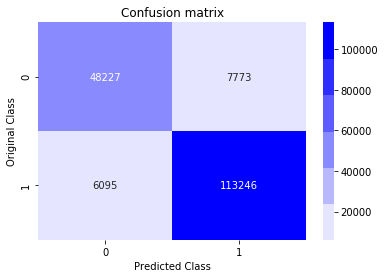

In [140]:
plot_cm(cm_lr)

In [141]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr_tr, tpr_tr,fpr_te, tpr_te):
    '''
    plot the ROC curve for the FPR and TPR value
    '''
    plt.plot(fpr_te, tpr_te, 'k.-', color='orange', label='ROC_test AUC:%.3f'% auc(fpr_te, tpr_te))
    plt.plot(fpr_tr, tpr_tr, 'k.-', color='green', label='ROC_train AUC:%.3f'% auc(fpr_tr, tpr_tr))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC_LR:  0.9050621453739406


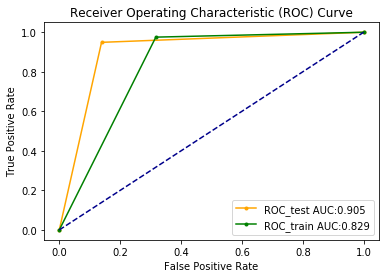

In [142]:
#finding the FPR and TPR for logistic reg model set
fpr_te_lr, tpr_te_lr, t_te_lr = roc_curve(y_test, predict_y_te_lr)
fpr_tr_lr, tpr_tr_lr, t_tr_lr = roc_curve(y_train, predict_y_tr_lr)
auc_te_lr = auc(fpr_te_lr, tpr_te_lr)
print("AUC_LR: ",auc_te_lr)
plot_roc_curve(fpr_tr_lr,tpr_tr_lr,fpr_te_lr, tpr_te_lr)

## 5.3 Support Vector Machine Model

In [143]:
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
svm_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='hinge', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
svm_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             pre_disp

In [144]:
print(svm_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 1, 'max_iter': 10}


In [145]:
svm=SGDClassifier(alpha=svm_cfl.best_params_['alpha'],eta0=svm_cfl.best_params_['eta0'], penalty='l2', loss='hinge', n_jobs = -1, max_iter=svm_cfl.best_params_['max_iter'])
svm.fit(df_train,y_train)
sig_clf_svm = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf_svm.fit(df_train, y_train)
predict_y_tr_svm = sig_clf.predict(df_train)
predict_y_te_svm = sig_clf_svm.predict(df_test)
svm_f1 = f1_score(y_test, predict_y_te_svm)
print("F1-Score", svm_f1)

F1-Score 0.9197150144204811


In [146]:
cm_svm = confusion_matrix(y_test, predict_y_te_svm)

In [147]:
tn, fp, fn, tp = cm_svm.ravel()

In [148]:
fpr_svm = fp/(fp+tn)*100
fnr_svm = fn/(fn+tp)*100
far_svm = (fpr_svm+fnr_svm)/2
print("FAR:", far_svm)

FAR: 9.417783793619005


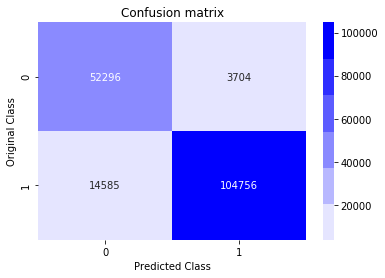

In [149]:
plot_cm(cm_svm)

AUC_SVM:  0.9058221620638099


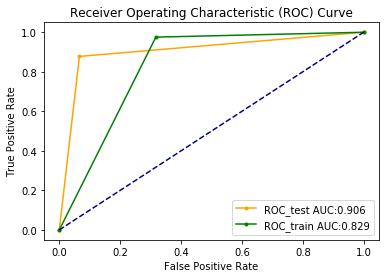

In [150]:
#finding the FPR and TPR for SVM set
fpr_te_svm, tpr_te_svm, t_te_svm = roc_curve(y_test, predict_y_te_svm)
fpr_tr_svm, tpr_tr_svm, t_tr_svm = roc_curve(y_train, predict_y_tr_svm)
auc_te_svm = auc(fpr_te_svm, tpr_te_svm)
print("AUC_SVM: ",auc_te_svm)
plot_roc_curve(fpr_tr_svm,tpr_tr_svm,fpr_te_svm, tpr_te_svm)

## 5.4 Random Forest Model

In [151]:
param_grid = {"n_estimators": [10,100,500,1000, 2000],
    "min_samples_split": [50, 80, 120, 200],
              "max_depth": [3, 5, 10, 50, 100]}
rfc = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
gridCV_rfc = GridSearchCV(rfc, param_grid, cv=3, verbose=10, n_jobs=-1)
gridCV_rfc.fit(df_train, y_train)
#grid Search cv results are stored in result for future use
results_rfc = pd.DataFrame.from_dict(gridCV_rfc.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 22

In [152]:
results_rfc = results_rfc.sort_values(['rank_test_score'])
results_rfc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
62,63.188302,5.296170,8.351116,0.673394,50,50,500,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.950590,0.945453,0.902128,0.932724,0.021736,1
82,57.129693,3.058769,6.948288,0.296046,100,50,500,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.950590,0.945453,0.902128,0.932724,0.021736,1
63,118.540384,13.901412,9.046493,0.692907,50,50,1000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.950736,0.944979,0.902310,0.932675,0.021599,3
83,108.926263,12.328838,8.117628,0.368971,100,50,1000,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.950736,0.944979,0.902310,0.932675,0.021599,3
64,224.453358,22.106221,11.170527,1.758222,50,50,2000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.950772,0.945088,0.901399,0.932420,0.022057,5


In [153]:
print(gridCV_rfc.best_params_)

{'max_depth': 50, 'min_samples_split': 50, 'n_estimators': 500}


In [154]:
rfc= RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=gridCV_rfc.best_params_['max_depth'],min_samples_split=gridCV_rfc.best_params_['min_samples_split'], n_estimators=gridCV_rfc.best_params_['n_estimators'])
rfc.fit(df_train,y_train)
sig_clf_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
sig_clf_rfc.fit(df_train, y_train)
predict_y_tr_rfc = sig_clf_rfc.predict(df_train)
predict_y_te_rfc = sig_clf_rfc.predict(df_test)
rfc_f1 = f1_score(y_test, predict_y_te_rfc)
print(rfc_f1)

0.929126145048273


In [82]:
cm_rfc = confusion_matrix(y_test, predict_y_te_rfc)

In [83]:
tn, fp, fn, tp = cm_rfc.ravel()

In [157]:
fpr_rfc = fp/(fp+tn)*100
fnr_rfc = fn/(fn+tp)*100
far_rfc = (fpr_rfc+fnr_rfc)/2
print("far:",far_rfc)

far: 7.679130780105509


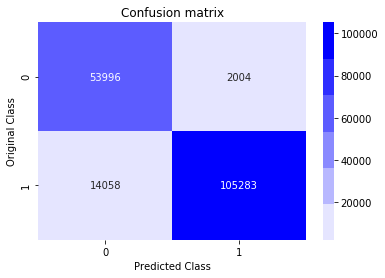

In [158]:
plot_cm(cm_rfc)

AUC_RFC:  0.9232086921989449


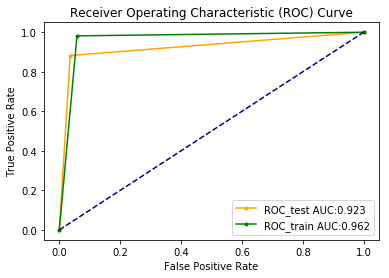

In [159]:
#finding the FPR and TPR for RFC set
fpr_te_rfc, tpr_te_rfc, t_te_rfc = roc_curve(y_test, predict_y_te_rfc)
fpr_tr_rfc, tpr_tr_rfc, t_tr_rfc = roc_curve(y_train, predict_y_tr_rfc)
auc_te_rfc = auc(fpr_te_rfc, tpr_te_rfc)
print("AUC_RFC: ",auc_te_rfc)
plot_roc_curve(fpr_tr_rfc,tpr_tr_rfc,fpr_te_rfc, tpr_te_rfc)

## 5.5 Stacking classifier

In [54]:
clf1 = SGDClassifier(alpha=0.0001,eta0=1, penalty='l2', loss='log', n_jobs = -1, max_iter=10)
clf1.fit(df_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001,eta0=0.0001, penalty='l2', loss='hinge', n_jobs = -1, max_iter=5)
clf2.fit(df_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=50,min_samples_split=50, n_estimators=10)
clf3.fit(df_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

In [81]:
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
    sclf.fit(df_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log loss: %0.3f F1-score: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(df_test)),f1_score(y_test, sclf.predict(df_test))))

Stacking Classifer : for the value of alpha: 0.000100 Log loss: 0.422 F1-score: 0.946
Stacking Classifer : for the value of alpha: 0.001000 Log loss: 0.252 F1-score: 0.931
Stacking Classifer : for the value of alpha: 0.010000 Log loss: 0.221 F1-score: 0.930
Stacking Classifer : for the value of alpha: 0.100000 Log loss: 0.216 F1-score: 0.931
Stacking Classifer : for the value of alpha: 1.000000 Log loss: 0.215 F1-score: 0.931
Stacking Classifer : for the value of alpha: 10.000000 Log loss: 0.218 F1-score: 0.930


In [101]:
lr = LogisticRegression(C=0.0001)
sig_clf_sc = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
sig_clf_sc.fit(df_train, y_train)
predict_y_tr_sc= sig_clf_sc.predict(df_train)
predict_y_te_sc = sig_clf_sc.predict(df_test)
sc_f1 = f1_score(y_test, predict_y_te_sc)
print(sc_f1)

0.9453929718455836


In [85]:
import pickle

file_pkl = "model_rf.pkl"
with open(file_pkl, 'wb') as file:
    pickle.dump(sig_clf_rfc, file)

In [102]:
cm_sc = confusion_matrix(y_test, predict_y_te_sc)

In [103]:
tn, fp, fn, tp = cm_sc.ravel()

In [104]:
fpr_sc = fp/(fp+tn)*100
fnr_sc = fn/(fn+tp)*100
far_sc = (fpr_sc+fnr_sc)/2
print("far:",far_sc)

far: 7.396553550929091


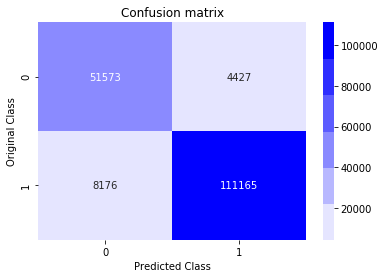

In [94]:
plot_cm(cm_sc)

AUC_SC:  0.9262184317717418


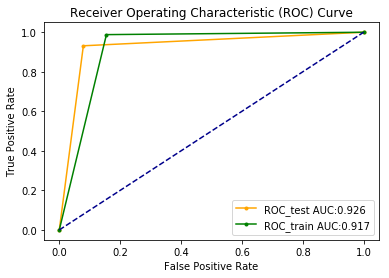

In [95]:
#finding the FPR and TPR for RFC set
fpr_te_sc, tpr_te_sc, t_te_sc = roc_curve(y_test, predict_y_te_sc)
fpr_tr_sc, tpr_tr_sc, t_tr_sc = roc_curve(y_train, predict_y_tr_sc)
auc_te_sc = auc(fpr_te_sc, tpr_te_sc)
print("AUC_SC: ",auc_te_sc)
plot_roc_curve(fpr_tr_sc,tpr_tr_sc,fpr_te_sc, tpr_te_sc)

## 5.6. Model Evaluation

Measures | Equations
----------|------------
FPR | FP/(TN + FP)
FNR | FN/(FN + TP)
FAR | (FPR + FNR)/2

In [178]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
x.add_row(["Logistic Regression", "{0:.4}".format(lr_f1), "{0:.4}".format(auc_te_lr),"%.2f" % float(fpr_lr),"%.2f" % float(fnr_lr),"%.2f" % float(far_lr)])
x.add_row(["Linear SVM", "{0:.4}".format(svm_f1), "{0:.4}".format(auc_te_svm),"%.2f" % float(fpr_svm),"%.2f" % float(fnr_svm),"%.2f" % float(far_svm)])
x.add_row(["Random Forest", "{0:.4}".format(rfc_f1), "{0:.4}".format(auc_te_rfc),"%.2f" % float(fpr_rfc),"%.2f" % float(fnr_rfc),"%.2f" % float(far_rfc)])
x.add_row(["Stacking Classifier", "{0:.4}".format(sc_f1), "{0:.4}".format(auc_te_sc),"%.2f" % float(fpr_sc),"%.2f" % float(fnr_sc),"%.2f" % float(far_sc)])
print(x)

+---------------------+----------+--------+-------+-------+-------+
|        Model        | F1 Score |  AUC   | FPR % | FNR % | FAR % |
+---------------------+----------+--------+-------+-------+-------+
| Logistic Regression |  0.9423  | 0.9051 | 13.88 |  5.11 |  9.49 |
|      Linear SVM     |  0.9197  | 0.9058 |  6.61 | 12.22 |  9.42 |
|    Random Forest    |  0.9291  | 0.9232 |  3.58 | 11.78 |  7.68 |
| Stacking Classifier |  0.9453  | 0.9262 |  7.91 |  6.85 |  7.39 |
+---------------------+----------+--------+-------+-------+-------+


# 6. Machine Learning Models (Label Encoder)

## 6.1 Reading Train and Test data

In [17]:
train_data = pd.read_csv("data/UNSW_NB15_training-set.csv")
print(train_data.shape)
train_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [18]:
cat_feature = train_data.select_dtypes(include=['category', object]).columns

In [19]:
train_data[cat_feature] = train_data[cat_feature].apply(LabelEncoder().fit_transform)
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


In [20]:
df_train = train_data[list(col_set)]
df_train.head()

,ackdat,dmean,proto,ct_state_ttl,ct_dst_ltm,trans_depth,service,ct_dst_src_ltm,response_body_len,dload,...,djit,synack,sjit,dloss,dtcpb,swin,stcpb,tcprtt,is_sm_ips_ports,sttl
0,0.0,0,117,2,1,0,0,2,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,254
1,0.0,0,117,2,1,0,0,2,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,254
2,0.0,0,117,2,1,0,0,3,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,254
3,0.0,0,117,2,2,0,0,3,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,254
4,0.0,0,117,2,2,0,0,3,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,254


In [21]:
test_data = pd.read_csv("data/UNSW_NB15_testing-set.csv")
print(test_data.shape)
test_data.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [22]:
cat_feature_test = test_data.select_dtypes(include=['category', object]).columns

In [23]:
test_data[cat_feature_test] = test_data[cat_feature_test].apply(LabelEncoder().fit_transform)
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [24]:
df_test = test_data[list(col_set)]
df_test.head()

,ackdat,dmean,proto,ct_state_ttl,ct_dst_ltm,trans_depth,service,ct_dst_src_ltm,response_body_len,dload,...,djit,synack,sjit,dloss,dtcpb,swin,stcpb,tcprtt,is_sm_ips_ports,sttl
0,0.000000,43,113,0,1,0,0,1,0,8495.365234,...,11.830604,0.000000,30.177547,0,2202533631,255,621772692,0.000000,0,252
1,0.000000,1106,113,1,1,0,0,2,0,503571.312500,...,1387.778330,0.000000,61.426934,17,3077387971,255,1417884146,0.000000,0,62
2,0.050439,824,113,1,2,0,0,3,0,60929.230470,...,11420.926230,0.061458,17179.586860,6,2963114973,255,2116150707,0.111897,0,62
3,0.000000,64,113,1,2,0,3,3,0,3358.622070,...,4991.784669,0.000000,259.080172,3,1047442890,255,1107119177,0.000000,0,62
4,0.057234,45,113,1,2,0,0,40,0,3987.059814,...,115.807000,0.071147,2415.837634,1,1977154190,255,2436137549,0.128381,0,254


### 6.1.1 Standardize the data

In [25]:
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [26]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.9,0.333333,0.000000,0.0,0.0,0.016129,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078
1,0.0,0.0,0.9,0.333333,0.000000,0.0,0.0,0.016129,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078
2,0.0,0.0,0.9,0.333333,0.000000,0.0,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078
3,0.0,0.0,0.9,0.333333,0.017241,0.0,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078
4,0.0,0.0,0.9,0.333333,0.017241,0.0,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078


In [27]:
y_train = train_data['label']
y_test = test_data['label']
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

train data shape (82332, 30) (82332,)
test data shape (175341, 30) (175341,)


In [28]:
[10 ** x for x in range(-5, 2)]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

## 6.2 Logistic Regression Model

In [156]:
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
lr_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='log', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
lr_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             pre_dispat

In [157]:
results = pd.DataFrame.from_dict(lr_cfl.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.659036,0.014011,0.007781,0.000399,0.0001,0.001,100,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 100}",0.913463,0.961134,0.858071,0.795943,0.772015,0.860125,0.070618,1
7,0.619651,0.027652,0.008979,0.001263,0.0001,0.001,20,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 20}",0.905629,0.978928,0.845621,0.793878,0.765395,0.857890,0.077113,2
6,0.601999,0.037194,0.010476,0.001782,0.0001,0.001,10,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10}",0.905872,0.944131,0.859104,0.801348,0.765820,0.855255,0.065392,3
21,0.626726,0.041205,0.011367,0.001019,0.0001,1,10,"{'alpha': 0.0001, 'eta0': 1, 'max_iter': 10}",0.904415,0.966721,0.839184,0.797279,0.760962,0.853712,0.073946,4
16,0.582242,0.020178,0.011183,0.005554,0.0001,0.1,10,"{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 10}",0.899435,0.978381,0.838759,0.776388,0.760962,0.850785,0.080493,5


In [158]:
print(lr_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 100}


In [159]:
logisticR=SGDClassifier(alpha=lr_cfl.best_params_['alpha'],eta0=lr_cfl.best_params_['eta0'], penalty='l2', loss='log', n_jobs = -1, max_iter=lr_cfl.best_params_['max_iter'])
logisticR.fit(df_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(df_train, y_train)
predict_y_tr_lr = sig_clf.predict(df_train)
predict_y_te_lr = sig_clf.predict(df_test)
lr_f1 = f1_score(y_test, predict_y_te_lr)
print(lr_f1)

0.8029353446987435


In [160]:
cm_lr = confusion_matrix(y_test, predict_y_te_lr)

In [161]:
tn, fp, fn, tp = cm_lr.ravel()

In [162]:
fpr_lr = fp/(fp+tn)*100
fnr_lr = fn/(fn+tp)*100
far_lr = (fpr_lr+fnr_lr)/2
print("FAR: %0.2f" %far_lr)

FAR: 16.95


In [40]:
def plot_cm(cm):
    sns.heatmap(cm, annot=True, cmap=sns.light_palette("blue"), fmt="g")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

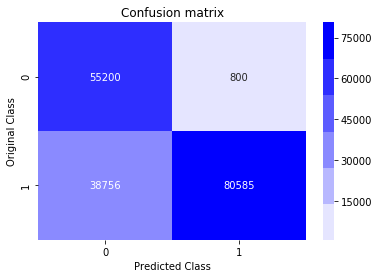

In [164]:
plot_cm(cm_lr)

In [43]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr_tr, tpr_tr,fpr_te, tpr_te):
    '''
    plot the ROC curve for the FPR and TPR value
    '''
    plt.plot(fpr_te, tpr_te, 'k.-', color='orange', label='ROC_test AUC:%.3f'% auc(fpr_te, tpr_te))
    plt.plot(fpr_tr, tpr_tr, 'k.-', color='green', label='ROC_train AUC:%.3f'% auc(fpr_tr, tpr_tr))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC_LR:  0.8304820999129745


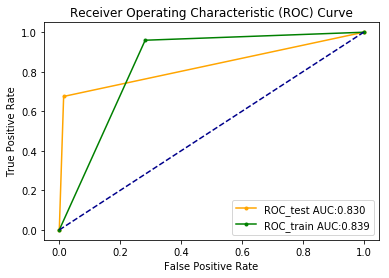

In [166]:
#finding the FPR and TPR for logistic reg model set
fpr_te_lr, tpr_te_lr, t_te_lr = roc_curve(y_test, predict_y_te_lr)
fpr_tr_lr, tpr_tr_lr, t_tr_lr = roc_curve(y_train, predict_y_tr_lr)
auc_te_lr = auc(fpr_te_lr, tpr_te_lr)
print("AUC_LR: ",auc_te_lr)
plot_roc_curve(fpr_tr_lr,tpr_tr_lr,fpr_te_lr, tpr_te_lr)

## 6.3 Support Vector Machine Model

In [167]:
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
svm_cfl=GridSearchCV(SGDClassifier(penalty='l1', loss='hinge', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
svm_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l1', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             pre_disp

In [168]:
print(svm_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 100}


In [169]:
svm=SGDClassifier(alpha=svm_cfl.best_params_['alpha'],eta0=svm_cfl.best_params_['eta0'], penalty='l2', loss='hinge', n_jobs = -1, max_iter=svm_cfl.best_params_['max_iter'])
svm.fit(df_train,y_train)
sig_clf_svm = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf_svm.fit(df_train, y_train)
predict_y_tr_svm = sig_clf.predict(df_train)
predict_y_te_svm = sig_clf_svm.predict(df_test)
svm_f1 = f1_score(y_test, predict_y_te_svm)
print("F1-Score", svm_f1)

F1-Score 0.8570189661023341


In [170]:
cm_svm = confusion_matrix(y_test, predict_y_te_svm)

In [171]:
tn, fp, fn, tp = cm_svm.ravel()

In [172]:
fpr_svm = fp/(fp+tn)*100
fnr_svm = fn/(fn+tp)*100
far_svm = (fpr_svm+fnr_svm)/2
print("FAR: %0.2f" % far_svm)

FAR: 13.62


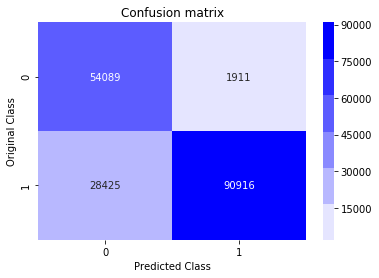

In [173]:
plot_cm(cm_svm)

AUC_SVM:  0.8638459891194141


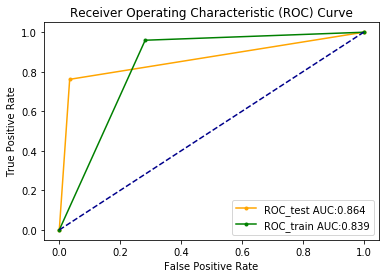

In [174]:
#finding the FPR and TPR for SVM set
fpr_te_svm, tpr_te_svm, t_te_svm = roc_curve(y_test, predict_y_te_svm)
fpr_tr_svm, tpr_tr_svm, t_tr_svm = roc_curve(y_train, predict_y_tr_svm)
auc_te_svm = auc(fpr_te_svm, tpr_te_svm)
print("AUC_SVM: ",auc_te_svm)
plot_roc_curve(fpr_tr_svm,tpr_tr_svm,fpr_te_svm, tpr_te_svm)

## 6.4 Random Forest Model

In [175]:
param_grid = {"n_estimators": [10,100,500,1000, 2000],
    "min_samples_split": [50, 80, 120, 200],
              "max_depth": [3, 5, 10, 50, 100]}
rfc = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
gridCV_rfc = GridSearchCV(rfc, param_grid, cv=3, return_train_score=True, verbose=10, n_jobs=-1)
gridCV_rfc.fit(df_train, y_train)
#grid Search cv results are stored in result for future use
results_rfc = pd.DataFrame.from_dict(gridCV_rfc.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 22

In [176]:
results_rfc = results_rfc.sort_values(['rank_test_score'])
results_rfc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
64,207.673127,17.483878,14.140464,1.567208,50,50,2000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.874071,0.944651,0.898921,0.905881,0.029231,1,0.969374,0.967461,0.974767,0.970534,0.003093
84,208.767452,17.792458,14.420839,1.246119,100,50,2000,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.874071,0.944651,0.898921,0.905881,0.029231,1,0.969374,0.967461,0.974767,0.970534,0.003093
63,109.719585,14.179158,7.163603,0.395994,50,50,1000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.871192,0.944760,0.899177,0.905043,0.030319,3,0.969210,0.967643,0.974730,0.970528,0.003040
83,108.777701,11.380208,10.336323,0.203533,100,50,1000,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.871192,0.944760,0.899177,0.905043,0.030319,3,0.969210,0.967643,0.974730,0.970528,0.003040
82,55.538241,2.770431,6.988311,0.162329,100,50,500,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.871302,0.944724,0.898849,0.904958,0.030284,5,0.969101,0.967607,0.974785,0.970497,0.003092


In [177]:
print(gridCV_rfc.best_params_)

{'max_depth': 50, 'min_samples_split': 50, 'n_estimators': 2000}


In [178]:
rfc= RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=gridCV_rfc.best_params_['max_depth'],min_samples_split=gridCV_rfc.best_params_['min_samples_split'], n_estimators=gridCV_rfc.best_params_['n_estimators'])
rfc.fit(df_train,y_train)
sig_clf_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
sig_clf_rfc.fit(df_train, y_train)
predict_y_tr_rfc = sig_clf_rfc.predict(df_train)
predict_y_te_rfc = sig_clf_rfc.predict(df_test)
rfc_f1 = f1_score(y_test, predict_y_te_rfc)
print(rfc_f1)

0.9405912523518647


In [179]:
cm_rfc = confusion_matrix(y_test, predict_y_te_rfc)

In [180]:
tn, fp, fn, tp = cm_rfc.ravel()

In [181]:
fpr_rfc = fp/(fp+tn)*100
fnr_rfc = fn/(fn+tp)*100
far_rfc = (fpr_rfc+fnr_rfc)/2
print("far:",far_rfc)

far: 7.676136262295199


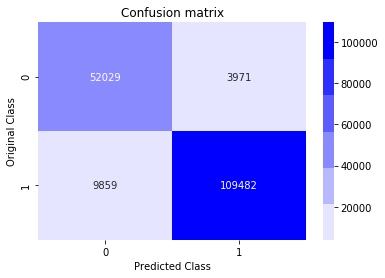

In [182]:
plot_cm(cm_rfc)

AUC_RFC:  0.923238637377048


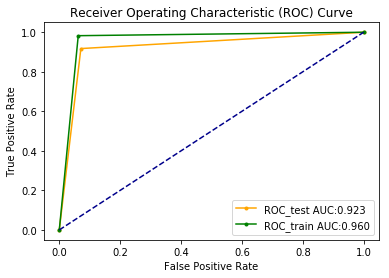

In [183]:
#finding the FPR and TPR for RFC set
fpr_te_rfc, tpr_te_rfc, t_te_rfc = roc_curve(y_test, predict_y_te_rfc)
fpr_tr_rfc, tpr_tr_rfc, t_tr_rfc = roc_curve(y_train, predict_y_tr_rfc)
auc_te_rfc = auc(fpr_te_rfc, tpr_te_rfc)
print("AUC_RFC: ",auc_te_rfc)
plot_roc_curve(fpr_tr_rfc,tpr_tr_rfc,fpr_te_rfc, tpr_te_rfc)

## 6.5 Stacking classifier

In [32]:
clf1 = SGDClassifier(alpha=0.0001,eta0=0.001, penalty='l2', loss='log', n_jobs = -1, max_iter=100)
clf1.fit(df_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001,eta0=0.01, penalty='l2', loss='hinge', n_jobs = -1, max_iter=100)
clf2.fit(df_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=50,min_samples_split=50, n_estimators=2000)
clf3.fit(df_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

In [32]:
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
    sclf.fit(df_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log loss: %0.3f F1-score: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(df_test)),f1_score(y_test, sclf.predict(df_test))))
    log_error =log_loss(y_test, sclf.predict_proba(df_test))
    if best_alpha > log_error:
        best_alpha = log_error

Stacking Classifer : for the value of alpha: 0.000100 Log loss: 0.431 F1-score: 0.918
Stacking Classifer : for the value of alpha: 0.001000 Log loss: 0.283 F1-score: 0.924
Stacking Classifer : for the value of alpha: 0.010000 Log loss: 0.245 F1-score: 0.930
Stacking Classifer : for the value of alpha: 0.100000 Log loss: 0.243 F1-score: 0.931
Stacking Classifer : for the value of alpha: 1.000000 Log loss: 0.238 F1-score: 0.932
Stacking Classifer : for the value of alpha: 10.000000 Log loss: 0.241 F1-score: 0.932


In [35]:
lr = LogisticRegression(C=10)
sig_clf_sc = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
sig_clf_sc.fit(df_train, y_train)
predict_y_tr_sc= sig_clf_sc.predict(df_train)
predict_y_te_sc = sig_clf_sc.predict(df_test)
sc_f1 = f1_score(y_test, predict_y_te_sc)
print(sc_f1)

0.9318461928445934


In [36]:
cm_sc = confusion_matrix(y_test, predict_y_te_sc)

In [37]:
tn, fp, fn, tp = cm_sc.ravel()

In [38]:
fpr_sc = fp/(fp+tn)*100
fnr_sc = fn/(fn+tp)*100
far_sc = (fpr_sc+fnr_sc)/2
print("far:",far_sc)

far: 7.88822963937672


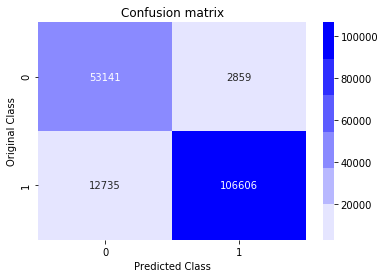

In [41]:
plot_cm(cm_sc)

AUC_SC:  0.9211177036062328


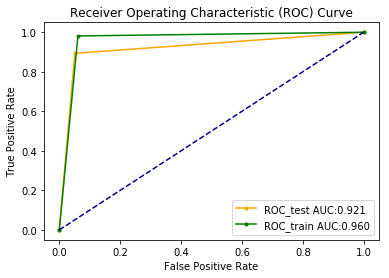

In [44]:
#finding the FPR and TPR for RFC set
fpr_te_sc, tpr_te_sc, t_te_sc = roc_curve(y_test, predict_y_te_sc)
fpr_tr_sc, tpr_tr_sc, t_tr_sc = roc_curve(y_train, predict_y_tr_sc)
auc_te_sc = auc(fpr_te_sc, tpr_te_sc)
print("AUC_SC: ",auc_te_sc)
plot_roc_curve(fpr_tr_sc,tpr_tr_sc,fpr_te_sc, tpr_te_sc)

## 6.6 Model Evaluation

In [45]:
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
x.add_row(["Logistic Regression", "{0:.4}".format(lr_f1), "{0:.4}".format(auc_te_lr),"%.2f" % float(fpr_lr),"%.2f" % float(fnr_lr),"%.2f" % float(far_lr)])
x.add_row(["Linear SVM", "{0:.4}".format(svm_f1), "{0:.4}".format(auc_te_svm),"%.2f" % float(fpr_svm),"%.2f" % float(fnr_svm),"%.2f" % float(far_svm)])
x.add_row(["Random Forest", "{0:.4}".format(rfc_f1), "{0:.4}".format(auc_te_rfc),"%.2f" % float(fpr_rfc),"%.2f" % float(fnr_rfc),"%.2f" % float(far_rfc)])
x.add_row(["Stacking Classifier", "{0:.4}".format(sc_f1), "{0:.4}".format(auc_te_sc),"%.2f" % float(fpr_sc),"%.2f" % float(fnr_sc),"%.2f" % float(far_sc)])
print(x)

+---------------------+----------+--------+-------+-------+-------+
|        Model        | F1 Score |  AUC   | FPR % | FNR % | FAR % |
+---------------------+----------+--------+-------+-------+-------+
| Logistic Regression |  0.8029  | 0.8305 |  1.43 | 32.48 | 16.95 |
|      Linear SVM     |  0.857   | 0.8638 |  3.41 | 23.82 | 13.62 |
|    Random Forest    |  0.9406  | 0.9232 |  7.09 |  8.26 |  7.68 |
| Stacking Classifier |  0.9318  | 0.9211 |  5.11 | 10.67 |  7.89 |
+---------------------+----------+--------+-------+-------+-------+


# 7. Machine Learning Models (One Hot Encoding)

## 7.1 Reading Train and Test data

In [17]:
train_data = pd.read_csv("data/UNSW_NB15_training-set.csv")
print(train_data.shape)
train_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [18]:
df_train = train_data[list(col_set)]
df_train.head()

,sttl,ct_state_ttl,stcpb,trans_depth,dttl,proto,dmean,ct_dst_sport_ltm,dinpkt,ackdat,...,response_body_len,djit,swin,dload,ct_flw_http_mthd,ct_src_dport_ltm,ct_dst_ltm,is_ftp_login,dloss,ct_dst_src_ltm
0,254,2,0,0,0,udp,0,1,0.0,0.0,...,0,0.0,0,0.0,0,1,1,0,0,2
1,254,2,0,0,0,udp,0,1,0.0,0.0,...,0,0.0,0,0.0,0,1,1,0,0,2
2,254,2,0,0,0,udp,0,1,0.0,0.0,...,0,0.0,0,0.0,0,1,1,0,0,3
3,254,2,0,0,0,udp,0,1,0.0,0.0,...,0,0.0,0,0.0,0,2,2,0,0,3
4,254,2,0,0,0,udp,0,1,0.0,0.0,...,0,0.0,0,0.0,0,2,2,0,0,3


In [19]:
cat_features = df_train.select_dtypes(include=['category', object]).columns
cat_features

Index(['proto', 'state', 'service'], dtype='object')

In [20]:
ohe = OneHotEncoder()
cat_f = pd.DataFrame(ohe.fit_transform(train_data[cat_features]).toarray())

In [21]:
cat_f.shape

(82332, 151)

In [22]:
df_train = df_train.drop(cat_features, axis=1)
df_train.shape

(82332, 27)

In [23]:
df_train = df_train.join(cat_f)

In [24]:
df_train.head()

,sttl,ct_state_ttl,stcpb,trans_depth,dttl,dmean,ct_dst_sport_ltm,dinpkt,ackdat,sloss,...,141,142,143,144,145,146,147,148,149,150
0,254,2,0,0,0,0,1,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,254,2,0,0,0,0,1,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,254,2,0,0,0,0,1,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,254,2,0,0,0,0,1,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,254,2,0,0,0,0,1,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=150).fit_transform(df_train, train_data['label'])

In [26]:
X_new.shape

(82332, 150)

In [27]:
test_data = pd.read_csv("data/UNSW_NB15_testing-set.csv")
print(test_data.shape)
test_data.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [28]:
df_test = test_data[list(col_set)]
df_test.head()

,sttl,ct_state_ttl,stcpb,trans_depth,dttl,proto,dmean,ct_dst_sport_ltm,dinpkt,ackdat,...,response_body_len,djit,swin,dload,ct_flw_http_mthd,ct_src_dport_ltm,ct_dst_ltm,is_ftp_login,dloss,ct_dst_src_ltm
0,252,0,621772692,0,254,tcp,43,1,8.375000,0.000000,...,0,11.830604,255,8495.365234,0,1,1,0,0,1
1,62,1,1417884146,0,252,tcp,1106,1,15.432865,0.000000,...,0,1387.778330,255,503571.312500,0,1,1,0,17,2
2,62,1,2116150707,0,252,tcp,824,1,102.737203,0.050439,...,0,11420.926230,255,60929.230470,0,1,2,0,6,3
3,62,1,1107119177,0,252,tcp,64,1,90.235726,0.000000,...,0,4991.784669,255,3358.622070,0,1,2,1,3,3
4,254,1,2436137549,0,252,tcp,45,1,75.659602,0.057234,...,0,115.807000,255,3987.059814,0,2,2,0,1,40


In [29]:
cat_feature = df_test.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'state', 'service'], dtype='object')

In [30]:
ohe = OneHotEncoder()
cat_f_t = pd.DataFrame(ohe.fit_transform(df_test[cat_feature]).toarray())

In [31]:
cat_f_t.shape

(175341, 155)

In [32]:
df_test = df_test.drop(cat_features, axis=1)
df_test.shape

(175341, 27)

In [33]:
df_test = df_test.join(cat_f_t)

In [34]:
df_test.head()

,sttl,ct_state_ttl,stcpb,trans_depth,dttl,dmean,ct_dst_sport_ltm,dinpkt,ackdat,sloss,...,145,146,147,148,149,150,151,152,153,154
0,252,0,621772692,0,254,43,1,8.375000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,62,1,1417884146,0,252,1106,1,15.432865,0.000000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,1,2116150707,0,252,824,1,102.737203,0.050439,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,1,1107119177,0,252,64,1,90.235726,0.000000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,254,1,2436137549,0,252,45,1,75.659602,0.057234,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.feature_selection import SelectKBest, chi2
X_new_test = SelectKBest(chi2, k=150).fit_transform(df_test, test_data['label'])

In [36]:
X_new_test.shape

(175341, 150)

### 7.1.1 Standardize the data

In [37]:
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(X_new)
x_scaled = std_scaler.transform(X_new)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(X_new_test)
df_test = pd.DataFrame(x_scaled_test)

In [38]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.996078,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.996078,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.996078,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.996078,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.996078,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y_train = train_data['label']
y_test = test_data['label']
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

train data shape (82332, 150) (82332,)
test data shape (175341, 150) (175341,)


## 7.2 Logistic Regression Model

In [180]:
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
lr_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='log', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
lr_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             pre_dispat

In [181]:
results = pd.DataFrame.from_dict(lr_cfl.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,1.402684,0.131904,0.020544,0.008756,0.0001,0.01,50,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 50}",0.922390,0.986458,0.870643,0.812037,0.802745,0.878855,0.068991,1
16,1.436356,0.037683,0.018948,0.002602,0.0001,0.1,10,"{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 10}",0.894941,0.968057,0.888498,0.819750,0.804992,0.875248,0.058639,2
11,1.397862,0.072990,0.018155,0.001464,0.0001,0.01,10,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 10}",0.927552,0.971276,0.859893,0.819446,0.792785,0.874190,0.066485,3
12,1.544993,0.075344,0.016157,0.004106,0.0001,0.01,20,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 20}",0.924698,0.933928,0.871918,0.818414,0.821693,0.874130,0.048973,4
17,1.420799,0.126149,0.015758,0.001716,0.0001,0.1,20,"{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 20}",0.934111,0.945102,0.862201,0.813069,0.795822,0.870061,0.060918,5


In [182]:
print(lr_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 50}


In [183]:
logisticR=SGDClassifier(alpha=lr_cfl.best_params_['alpha'],eta0=lr_cfl.best_params_['eta0'], penalty='l2', loss='log', n_jobs = -1, max_iter=lr_cfl.best_params_['max_iter'])
logisticR.fit(df_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(df_train, y_train)
predict_y_tr_lr = sig_clf.predict(df_train)
predict_y_te_lr = sig_clf.predict(df_test)
lr_f1 = f1_score(y_test, predict_y_te_lr)
print(lr_f1)

0.9306771659712835


In [184]:
cm_lr = confusion_matrix(y_test, predict_y_te_lr)

In [185]:
tn, fp, fn, tp = cm_lr.ravel()

In [186]:
fpr_lr = (fp/(fp+tn))*100
fnr_lr = (fn/(fn+tp))*100
far_lr = (fpr_lr+fnr_lr)/2
print("FAR:",far_lr)

FAR: 15.533255051251693


In [46]:
def plot_cm(cm):
    sns.heatmap(cm, annot=True, cmap=sns.light_palette("blue"), fmt="g")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

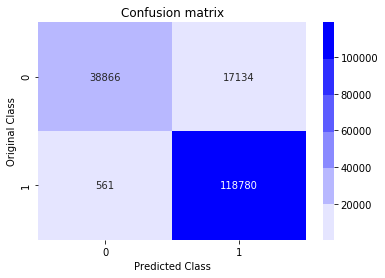

In [188]:
plot_cm(cm_lr)

In [47]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr_tr, tpr_tr,fpr_te, tpr_te):
    '''
    plot the ROC curve for the FPR and TPR value
    '''
    plt.plot(fpr_te, tpr_te, 'k.-', color='orange', label='ROC_test AUC:%.3f'% auc(fpr_te, tpr_te))
    plt.plot(fpr_tr, tpr_tr, 'k.-', color='green', label='ROC_train AUC:%.3f'% auc(fpr_tr, tpr_tr))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC_LR:  0.8446674494874831


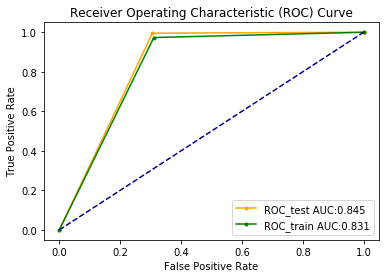

In [189]:
#finding the FPR and TPR for logistic reg model set
fpr_te_lr, tpr_te_lr, t_te_lr = roc_curve(y_test, predict_y_te_lr)
fpr_tr_lr, tpr_tr_lr, t_tr_lr = roc_curve(y_train, predict_y_tr_lr)
auc_te_lr = auc(fpr_te_lr, tpr_te_lr)
print("AUC_LR: ",auc_te_lr)
plot_roc_curve(fpr_tr_lr,tpr_tr_lr,fpr_te_lr, tpr_te_lr)

## 7.3 Support Vector Machine Model

In [199]:
prams={
    'alpha':[10 ** x for x in range(-5, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-5, 1)]
}
svm_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='hinge', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
svm_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
       

In [200]:
print(svm_cfl.best_params_)

{'alpha': 1e-05, 'eta0': 1e-05, 'max_iter': 100}


In [201]:
svm=SGDClassifier(alpha=svm_cfl.best_params_['alpha'],eta0=svm_cfl.best_params_['eta0'], penalty='l2', loss='hinge', n_jobs = -1, max_iter=svm_cfl.best_params_['max_iter'])
svm.fit(df_train,y_train)
sig_clf_svm = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf_svm.fit(df_train, y_train)
predict_y_tr_svm = sig_clf.predict(df_train)
predict_y_te_svm = sig_clf_svm.predict(df_test)
svm_f1 = f1_score(y_test, predict_y_te_svm)
print("F1-Score", svm_f1)

F1-Score 0.8934157791398737


In [202]:
cm_svm = confusion_matrix(y_test, predict_y_te_svm)

In [203]:
tn, fp, fn, tp = cm_svm.ravel()

In [204]:
fpr_svm = fp/(fp+tn)*100
fnr_svm = fn/(fn+tp)*100
far_svm = (fpr_svm+fnr_svm)/2
print("FAR:", far_svm)

FAR: 22.99486192477259


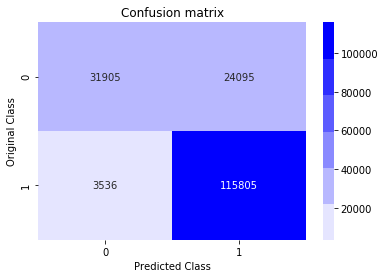

In [205]:
plot_cm(cm_svm)

AUC_SVM:  0.7700513807522741


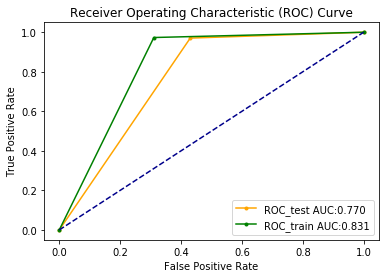

In [206]:
#finding the FPR and TPR for SVM set
fpr_te_svm, tpr_te_svm, t_te_svm = roc_curve(y_test, predict_y_te_svm)
fpr_tr_svm, tpr_tr_svm, t_tr_svm = roc_curve(y_train, predict_y_tr_svm)
auc_te_svm = auc(fpr_te_svm, tpr_te_svm)
print("AUC_SVM: ",auc_te_svm)
plot_roc_curve(fpr_tr_svm,tpr_tr_svm,fpr_te_svm, tpr_te_svm)

## 7.4 Random Forest Model

In [207]:
param_grid = {"n_estimators": [10,100,500,1000, 2000],
    "min_samples_split": [50, 80, 120, 200],
              "max_depth": [3, 5, 10, 50, 100]}
rfc = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
gridCV_rfc = GridSearchCV(rfc, param_grid, cv=3, verbose=10, n_jobs=-1)
gridCV_rfc.fit(df_train, y_train)
#grid Search cv results are stored in result for future use
results_rfc = pd.DataFrame.from_dict(gridCV_rfc.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 23

In [208]:
results_rfc = results_rfc.sort_values(['rank_test_score'])
results_rfc.head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
83,142.432115,18.089001,9.515215,0.412303,100,50,1000,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.926541,0.942355,0.896626,0.921841,0.018963,1
63,152.819562,14.167800,13.583502,1.334664,50,50,1000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.926541,0.942282,0.896444,0.921756,0.019017,2
64,302.903203,23.717455,18.424916,2.786622,50,50,2000,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.926468,0.942355,0.896189,0.921671,0.019150,3
84,270.264782,25.018238,16.924602,1.252264,100,50,2000,"{'max_depth': 100, 'min_samples_split': 50, 'n...",0.926541,0.942282,0.896116,0.921647,0.019163,4
62,81.389524,6.615336,9.358697,1.878683,50,50,500,"{'max_depth': 50, 'min_samples_split': 50, 'n_...",0.926396,0.942501,0.895934,0.921610,0.019310,5


In [209]:
print(gridCV_rfc.best_params_)

{'max_depth': 100, 'min_samples_split': 50, 'n_estimators': 1000}


In [210]:
rfc= RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=gridCV_rfc.best_params_['max_depth'],min_samples_split=gridCV_rfc.best_params_['min_samples_split'], n_estimators=gridCV_rfc.best_params_['n_estimators'])
rfc.fit(df_train,y_train)
sig_clf_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
sig_clf_rfc.fit(df_train, y_train)
predict_y_tr_rfc = sig_clf_rfc.predict(df_train)
predict_y_te_rfc = sig_clf_rfc.predict(df_test)
rfc_f1 = f1_score(y_test, predict_y_te_rfc)
print(rfc_f1)

0.9523705581088892


In [211]:
cm_rfc = confusion_matrix(y_test, predict_y_te_rfc)

In [212]:
tn, fp, fn, tp = cm_rfc.ravel()

In [213]:
fpr_rfc = fp/(fp+tn)*100
fnr_rfc = fn/(fn+tp)*100
far_rfc = (fpr_rfc+fnr_rfc)/2
print("far:",far_rfc)

far: 9.791693438190922


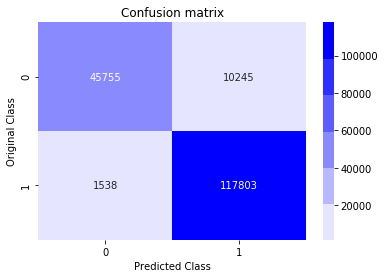

In [214]:
plot_cm(cm_rfc)

AUC_RFC:  0.9020830656180907


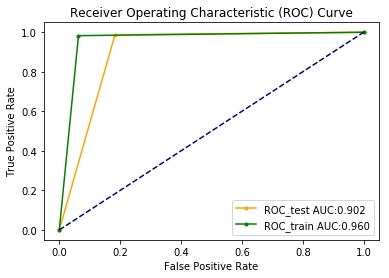

In [215]:
#finding the FPR and TPR for RFC set
fpr_te_rfc, tpr_te_rfc, t_te_rfc = roc_curve(y_test, predict_y_te_rfc)
fpr_tr_rfc, tpr_tr_rfc, t_tr_rfc = roc_curve(y_train, predict_y_tr_rfc)
auc_te_rfc = auc(fpr_te_rfc, tpr_te_rfc)
print("AUC_RFC: ",auc_te_rfc)
plot_roc_curve(fpr_tr_rfc,tpr_tr_rfc,fpr_te_rfc, tpr_te_rfc)

## 7.5 Stacking classifier

In [41]:
clf1 = SGDClassifier(alpha=0.0001,eta0=0.01, penalty='l2', loss='log', n_jobs = -1, max_iter=50)
clf1.fit(df_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1e-05,eta0=1e-05, penalty='l2', loss='hinge', n_jobs = -1, max_iter=100)
clf2.fit(df_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=100,min_samples_split=50, n_estimators=1000)
clf3.fit(df_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

In [44]:
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
    sclf.fit(df_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log loss: %0.3f F1-score: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(df_test)),f1_score(y_test, sclf.predict(df_test))))

Stacking Classifer : for the value of alpha: 0.000100 Log loss: 0.402 F1-score: 0.933
Stacking Classifer : for the value of alpha: 0.001000 Log loss: 0.258 F1-score: 0.938
Stacking Classifer : for the value of alpha: 0.010000 Log loss: 0.233 F1-score: 0.942
Stacking Classifer : for the value of alpha: 0.100000 Log loss: 0.222 F1-score: 0.943
Stacking Classifer : for the value of alpha: 1.000000 Log loss: 0.225 F1-score: 0.943
Stacking Classifer : for the value of alpha: 10.000000 Log loss: 0.225 F1-score: 0.943


In [45]:
lr = LogisticRegression(C=10)
sig_clf_sc = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
sig_clf_sc.fit(df_train, y_train)
predict_y_tr_sc= sig_clf_sc.predict(df_train)
predict_y_te_sc = sig_clf_sc.predict(df_test)
sc_f1 = f1_score(y_test, predict_y_te_sc)
print(sc_f1)

0.94252901026609


In [48]:
cm_sc = confusion_matrix(y_test, predict_y_te_sc)

In [49]:
tn, fp, fn, tp = cm_sc.ravel()

In [50]:
fpr_sc = fp/(fp+tn)*100
fnr_sc = fn/(fn+tp)*100
far_sc = (fpr_sc+fnr_sc)/2
print("far:",far_sc)

far: 12.412772418651475


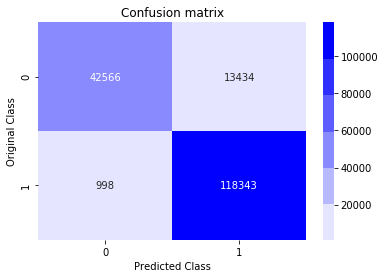

In [51]:
plot_cm(cm_sc)

AUC_SC:  0.8758722758134853


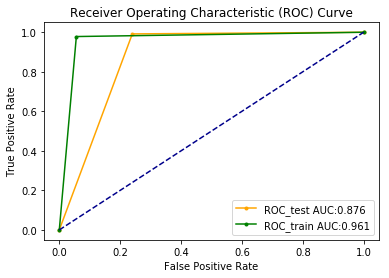

In [52]:
#finding the FPR and TPR for RFC set
fpr_te_sc, tpr_te_sc, t_te_sc = roc_curve(y_test, predict_y_te_sc)
fpr_tr_sc, tpr_tr_sc, t_tr_sc = roc_curve(y_train, predict_y_tr_sc)
auc_te_sc = auc(fpr_te_sc, tpr_te_sc)
print("AUC_SC: ",auc_te_sc)
plot_roc_curve(fpr_tr_sc,tpr_tr_sc,fpr_te_sc, tpr_te_sc)

# 7.6. Model Evaluation

In [53]:
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
x.add_row(["Logistic Regression", "{0:.4}".format(lr_f1), "{0:.4}".format(auc_te_lr),"%.2f" % float(fpr_lr),"%.2f" % float(fnr_lr),"%.2f" % float(far_lr)])
x.add_row(["Linear SVM", "{0:.4}".format(svm_f1), "{0:.4}".format(auc_te_svm),"%.2f" % float(fpr_svm),"%.2f" % float(fnr_svm),"%.2f" % float(far_svm)])
x.add_row(["Random Forest", "{0:.4}".format(rfc_f1), "{0:.4}".format(auc_te_rfc),"%.2f" % float(fpr_rfc),"%.2f" % float(fnr_rfc),"%.2f" % float(far_rfc)])
x.add_row(["Stacking Classifier", "{0:.4}".format(sc_f1), "{0:.4}".format(auc_te_sc),"%.2f" % float(fpr_sc),"%.2f" % float(fnr_sc),"%.2f" % float(far_sc)])
print(x)

+---------------------+----------+--------+-------+-------+-------+
|        Model        | F1 Score |  AUC   | FPR % | FNR % | FAR % |
+---------------------+----------+--------+-------+-------+-------+
| Logistic Regression |  0.9307  | 0.8447 |  30.6 |  0.47 | 15.53 |
|      Linear SVM     |  0.8934  | 0.7701 | 43.03 |  2.96 | 22.99 |
|    Random Forest    |  0.9524  | 0.9021 | 18.29 |  1.29 |  9.79 |
| Stacking Classifier |  0.9425  | 0.8759 | 23.99 |  0.84 | 12.41 |
+---------------------+----------+--------+-------+-------+-------+


# 8. Conclusion

- In this work, i have implemented Association rule based feature mining technique for features selection. i have used mode() selection of point for each attribute this reduces the processing time for identifying frequent value and Association Rule Mining (ARM) customized to find the highest ranked features by removing irrelevant or noisy features. Final features are than input to the machine learning model. 
- To differentiate between normal and attack i have used Logistic regression, linear SVM Random forest and stacking are used.
- The experimental results show that, Stacking classifier model performed well compared to other model. it has **94% of f1 measure** and **7.3% of False Alarm Rate** which is significantly lower than other models.
- Also we can understand that Response encoding preformed well compared to other categorical data encoding techniques.
- **False negative rate** also very much low in this case the cost associated with False Negative should be very low. because an intrusion cannot be predicted as normal.
- F1-score is weighted average of precision and recall. Precision is the measure of the correctly identified intrusion from all the predicted intrusion. Recall is the measure of the correctly identified intrusion from all the actual labeled intrusion.